# Data will be retransformed manually here - for the cases where data were preprocessed manually - change the path to your scaler in section: retransform the data

In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold
from mllib.model import KerasSurrogate
from helper_functions.scan_helper_functions import AdjustedRSquared
from helper_functions.ml_helper_functions import RSquaredSeparated, AdjustedRSquaredSeparated
from helper_functions.invertible_neural_network import InvertibleNetworkSurrogate
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [2]:
seed = 49857
tf.random.set_seed(seed)
np.random.seed(seed)

# Config

In [3]:
directory = os.path.dirname(os.path.dirname(os.getcwd()))
directory

'/data/user/boiger_r/aerosol'

In [4]:
test_datafile = directory +'/aerosol_data/raw_data/preprocessed_by_hand/log_P11/mmscaled/test_dataset.hdf5'

In [5]:
#model_name = 'invertible_model'
#val_model_name = 'forward_model'

In [6]:
#model_dir = directory +'/aerosol_results/simulated_data/models_overview/models_asha16'

In [7]:
#plot_dir = directory +'/aerosol_results/simulated_data/invertible_model4/plots/model'
#if not os.path.exists(plot_dir):
#    os.makedirs(plot_dir)

In [8]:
#test_datafile = directory +'/aerosol_data/raw_data/raw_data_preprocessed_wo_angles/test_dataset.hdf5'

In [9]:
model_name = 'invertible_model'
val_model_name = 'forward_model'

In [10]:
directory1 = '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/'
directory1 = directory1 + 'preprocessed_by_hand/log_P11/mmscaled_2'


In [11]:
plot_dir = directory1 + '/plots/model'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
#
model_dir = directory1 +'/model'
#if not os.path.exists(model_dir):
#    os.makedirs(model_dir)

# Load the model and the data (dvar, qoi) for testing

In [12]:
custom_objects = {'AdjustedRSquared': AdjustedRSquared}

kwargs = {'custom_objects': custom_objects,'compile': False}

surr = InvertibleNetworkSurrogate.load(model_dir, model_name, model_kwargs=kwargs)

In [13]:
dvar_test = pd.read_hdf(test_datafile,key = 'dvar')
qoi_test = pd.read_hdf(test_datafile,key = 'qoi')
dvar_test.reset_index(drop=True, inplace=True)
qoi_test.reset_index(drop=True, inplace=True)

In [14]:
dvar_test

V_tot  R_median       GSD   n_532nm   k_532nm
0      0.443443  0.811587  0.233606  0.584335  0.401067
1      0.457788  0.084071  0.376624  0.230062  0.123650
2      0.745937  0.320142  0.040548  0.432470  0.439470
3      0.411730  0.995724  0.772479  0.916919  0.714940
4      0.796292  0.910802  0.715194  0.470112  0.023043
...         ...       ...       ...       ...       ...
19995  0.517716  0.871809  0.643220  0.483886  0.051933
19996  0.181662  0.712758  0.116012  0.451895  0.338935
19997  0.114821  0.923641  0.368764  0.768825  0.363037
19998  0.899315  0.837893  0.563745  0.204833  0.035177
19999  0.522335  0.281561  0.940404  0.757415  0.163096

[20000 rows x 5 columns]

In [15]:
qoi_test

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0         0.818418     0.779692     0.744938     0.714682     0.689504   
1         0.881669     0.889967     0.897648     0.904563     0.910889   
2         0.932796     0.925297     0.917189     0.908499     0.899547   
3         0.772309     0.728002     0.690673     0.662973     0.640735   
4         0.865949     0.823814     0.789118     0.763217     0.745962   
...            ...          ...          ...          ...          ...   
19995     0.825930     0.786206     0.752346     0.725568     0.706298   
19996     0.740997     0.712660     0.686061     0.660985     0.639214   
19997     0.649358     0.612944     0.581631     0.557160     0.537781   
19998     0.894048     0.853370     0.819326     0.792871     0.771948   
19999     0.893996     0.890763     0.886851     0.882246     0.877276   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0          0.671432      0.654151      0.640967      0.630922      0.622801   
1          0.916221      0.919988      0.922530      0.923003      0.923220   
2          0.889727      0.878711      0.867050      0.852777      0.839607   
3          0.627982      0.616259      0.605858      0.598204      0.591730   
4          0.736150      0.729263      0.724867      0.722877      0.720527   
...             ...           ...           ...           ...           ...   
19995      0.694430      0.685043      0.678363      0.674933      0.671289   
19996      0.620539      0.602196      0.588801      0.577916      0.568939   
19997      0.526528      0.516165      0.507209      0.500416      0.494774   
19998      0.757373      0.749474      0.746607      0.743465      0.740815   
19999      0.871284      0.864078      0.855847      0.845491      0.835811   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
0      ...       0.502873       0.493991       0.487384       0.486953   
1      ...       0.327017       0.327766       0.330994       0.339480   
2      ...       0.304457       0.300414       0.300799       0.309226   
3      ...       0.537313       0.526410       0.517388       0.514517   
4      ...       0.882140       0.832674       0.777513       0.713146   
...    ...            ...            ...            ...            ...   
19995  ...       0.824043       0.797924       0.765148       0.722459   
19996  ...       0.455544       0.447662       0.443051       0.445375   
19997  ...       0.527663       0.517037       0.507831       0.504357   
19998  ...       0.551414       0.498966       0.458705       0.433092   
19999  ...       0.062182       0.070639       0.088557       0.117145   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0           0.488266       0.483839       0.477513       0.464634   
1           0.348781       0.353653       0.356122       0.350617   
2           0.322142       0.335066       0.348946       0.356474   
3           0.513415       0.506153       0.496808       0.480788   
4           0.645821       0.575317       0.507402       0.438685   
...              ...            ...            ...            ...   
19995       0.672801       0.613815       0.552387       0.487400   
19996       0.450255       0.450816       0.450281       0.443543   
19997       0.502453       0.494682       0.485309       0.469870   
19998       0.414291       0.390940       0.370046       0.351892   
19999       0.150906       0.185413       0.217164       0.237432   

       P12_0.532_174  P12_0.532_175  
0           0.530605       0.651677  
1           0.428731       0.555262  
2           0.446342       0.583005  
3           0.542735       0.660560  
4           0.456079       0.535099  
...              ...            ...  
19995       0.504784       0.586051  
19996       0.516510       0.643023  
19997       0.533632       0.653281  
19998       0.443987       0.644142  
19999       0.342248       0.4856

In [16]:
qoi_columns = qoi_test.columns
dvar_columns = dvar_test.columns

In [17]:
qoi_test_plot = qoi_test.copy()

# Prediction

## Forward Prediction

In [18]:
import time
start = time.time()
qoi_pred_fw = surr.predict(dvar_test.values)
end = time.time()
time = (end-start)/len(dvar_test)
time

0.00030235239267349244

In [19]:
qoi_columns

Index(['P11_0.532_5', 'P11_0.532_6', 'P11_0.532_7', 'P11_0.532_8',
       'P11_0.532_9', 'P11_0.532_10', 'P11_0.532_11', 'P11_0.532_12',
       'P11_0.532_13', 'P11_0.532_14',
       ...
       'P12_0.532_166', 'P12_0.532_167', 'P12_0.532_168', 'P12_0.532_169',
       'P12_0.532_170', 'P12_0.532_171', 'P12_0.532_172', 'P12_0.532_173',
       'P12_0.532_174', 'P12_0.532_175'],
      dtype='object', length=320)

In [20]:
qoi_pred_fw.shape

(20000, 320)

In [21]:
qoi_pred_fw = pd.DataFrame(data=qoi_pred_fw, columns=qoi_columns)
qoi_pred_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0         0.813511     0.772540     0.738097     0.702706     0.678631   
1         0.872908     0.886984     0.895683     0.903065     0.909760   
2         0.932056     0.924291     0.914049     0.903779     0.896354   
3         0.782009     0.734899     0.688418     0.654211     0.629268   
4         0.860346     0.832660     0.797300     0.768060     0.747913   
...            ...          ...          ...          ...          ...   
19995     0.822563     0.786897     0.750632     0.722147     0.702752   
19996     0.731049     0.708249     0.680606     0.654108     0.629921   
19997     0.640117     0.608496     0.575909     0.548767     0.525434   
19998     0.896189     0.855490     0.826710     0.796776     0.784150   
19999     0.888749     0.892534     0.888932     0.876906     0.877811   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0          0.660130      0.648508      0.634978      0.626653      0.613404   
1          0.920124      0.927733      0.927318      0.926398      0.926711   
2          0.886280      0.880750      0.864606      0.852400      0.835796   
3          0.623648      0.607081      0.595642      0.595480      0.581794   
4          0.735657      0.732985      0.724565      0.727173      0.718505   
...             ...           ...           ...           ...           ...   
19995      0.696428      0.685354      0.676032      0.675695      0.668992   
19996      0.617109      0.605116      0.592710      0.579473      0.570108   
19997      0.519343      0.512146      0.505765      0.494635      0.492359   
19998      0.763065      0.764990      0.755026      0.754343      0.749771   
19999      0.873499      0.866643      0.851476      0.847757      0.832960   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
0      ...       0.496551       0.502406       0.490688       0.489646   
1      ...       0.323012       0.327808       0.332426       0.337709   
2      ...       0.306153       0.317871       0.309465       0.334039   
3      ...       0.530916       0.522584       0.522402       0.506518   
4      ...       0.896072       0.848289       0.807141       0.718897   
...    ...            ...            ...            ...            ...   
19995  ...       0.824976       0.801127       0.783232       0.716937   
19996  ...       0.450543       0.439412       0.452344       0.441940   
19997  ...       0.511863       0.519882       0.508904       0.497456   
19998  ...       0.571885       0.522874       0.478452       0.435094   
19999  ...       0.064831       0.083072       0.103334       0.148192   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0           0.489560       0.486952       0.480749       0.460259   
1           0.349598       0.344237       0.342570       0.337819   
2           0.335115       0.344500       0.358488       0.369332   
3           0.519414       0.505128       0.495748       0.478468   
4           0.688439       0.592825       0.518839       0.436507   
...              ...            ...            ...            ...   
19995       0.698488       0.622810       0.556253       0.483113   
19996       0.459468       0.456085       0.455767       0.432157   
19997       0.494029       0.485612       0.476593       0.467058   
19998       0.426850       0.377135       0.348271       0.335846   
19999       0.179682       0.198256       0.232863       0.244675   

       P12_0.532_174  P12_0.532_175  
0           0.528460       0.651395  
1           0.424831       0.543918  
2           0.458680       0.589257  
3           0.541272       0.655474  
4           0.430344       0.522123  
...              ...            ...  
19995       0.497877       0.571110  
19996       0.517866       0.646399  
19997       0.520047       0.636306  
19998       0.442768       0.620566  
19999       0.362289       0.4959

In [22]:
qoi_pred_plot_fw = qoi_pred_fw.copy()
#qoi_pred_plot_fw

## Inverse prediction

In [23]:
import time
n_tries = 32
start = time.time()
dvar_pred_iv = surr.sample_n_tries(qoi_test.values, batch_size=128, n_tries=n_tries)
end = time.time()
iv_time = (end-start)/len(qoi_test)
iv_time

0.01781473491191864

In [24]:
dvar_pred_iv = pd.DataFrame(data=dvar_pred_iv, columns=dvar_columns)
dvar_pred_iv

V_tot  R_median       GSD   n_532nm   k_532nm
0      0.440727  0.810754  0.117713  0.583339  0.402478
1      0.468357  0.089188  0.532981  0.239318  0.119434
2      0.751895  0.321093  0.339314  0.423272  0.420989
3      0.382684  0.949108  0.326246  0.920430  0.767295
4      0.827044  0.914235  0.627725  0.460321  0.019847
...         ...       ...       ...       ...       ...
19995  0.502640  0.877436  0.601050  0.461308  0.050606
19996  0.182464  0.708992  0.159156  0.451038  0.334901
19997  0.106156  0.896420  0.186657  0.775709  0.371174
19998  0.910883  0.845325  0.501081  0.200668  0.036009
19999  0.511650  0.282284  0.907428  0.755053  0.155935

[20000 rows x 5 columns]

In [25]:
dvar_pred_iv.describe()

V_tot      R_median           GSD       n_532nm       k_532nm
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000
mean       0.500187      0.503708      0.514503      0.490604      0.316463
std        0.288600      0.284979      0.252479      0.293880      0.214321
min       -0.031138     -0.002934     -0.020267     -0.119304     -0.029793
25%        0.252201      0.253654      0.296728      0.232438      0.142246
50%        0.496099      0.504828      0.537897      0.489053      0.287054
75%        0.750607      0.751642      0.733675      0.746185      0.452118
max        1.065761      1.033386      1.006871      1.041486      1.056903

# Retransform the data

In [26]:
from pickle import load

In [27]:
directory
scaler_directory = directory +'/aerosol_data/raw_data/preprocessed_by_hand/log_P11/'

In [28]:
stscaler_dvar = load(open(f'{scaler_directory}mmscaler_dvar.pkl', 'rb'))
P11_stscaler_log = load(open(f'{scaler_directory}P11_mmscaler_log.pkl','rb'))
P12_stscaler = load(open(f'{scaler_directory}P12_mmscaler.pkl','rb'))

In [29]:
dvar_test = stscaler_dvar.inverse_transform(dvar_test)
dvar_test = pd.DataFrame(dvar_test, columns = dvar_columns)
dvar_test

V_tot  R_median       GSD   n_532nm   k_532nm
0      2217.771916  2.057228  1.411680  1.487770  0.080036
1      2289.484700  0.347572  1.418831  1.392117  0.024709
2      3729.921143  0.902338  1.402027  1.446767  0.087695
3      2059.242428  2.489947  1.438624  1.577567  0.142633
4      3981.638804  2.290383  1.435760  1.456930  0.004644
...            ...       ...       ...       ...       ...
19995  2589.057736  2.198749  1.432161  1.460649  0.010406
19996   909.147997  1.824980  1.405801  1.452012  0.067644
19997   575.016835  2.320553  1.418438  1.537582  0.072451
19998  4496.645635  2.119046  1.428187  1.385306  0.007064
19999  2612.147656  0.811673  1.447020  1.534501  0.032576

[20000 rows x 5 columns]

In [30]:
dvar_test.describe()

V_tot      R_median           GSD       n_532nm       k_532nm
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000
mean    2509.223313      1.330499      1.425121      1.464322      0.063182
std     1438.379766      0.679168      0.014523      0.078244      0.041996
min        1.099018      0.150048      1.400005      1.330011      0.000082
25%     1275.954658      0.740471      1.412597      1.395838      0.029100
50%     2498.542058      1.330260      1.425155      1.463991      0.058312
75%     3753.439413      1.918632      1.437681      1.531731      0.089416
max     4999.932117      2.499670      1.449993      1.599968      0.198153

In [31]:
dvar_pred_iv = stscaler_dvar.inverse_transform(dvar_pred_iv)
dvar_pred_iv = pd.DataFrame(dvar_pred_iv, columns = dvar_columns)
dvar_pred_iv

V_tot  R_median       GSD   n_532nm   k_532nm
0      2204.198233  2.055270  1.405886  1.487501  0.080317
1      2342.315439  0.359597  1.426649  1.394617  0.023868
2      3759.702171  0.904572  1.416966  1.444284  0.084009
3      1914.042258  2.380401  1.416312  1.578514  0.153075
4      4135.365292  2.298449  1.431386  1.454287  0.004007
...            ...       ...       ...       ...       ...
19995  2513.694862  2.211974  1.430052  1.454553  0.010141
19996   913.158689  1.816132  1.407958  1.451780  0.066840
19997   531.701685  2.256585  1.409333  1.539440  0.074074
19998  4554.473544  2.136513  1.425054  1.384181  0.007230
19999  2558.734795  0.813372  1.445371  1.533863  0.031147

[20000 rows x 5 columns]

In [32]:
dvar_pred_iv.describe()

V_tot      R_median           GSD       n_532nm       k_532nm
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000
mean    2501.432110      1.333716      1.425725      1.462463      0.063163
std     1442.688848      0.669698      0.012624      0.079347      0.042743
min     -154.621645      0.143113      1.398987      1.297790     -0.005893
25%     1261.770797      0.746090      1.414836      1.392759      0.028417
50%     2480.999182      1.336347      1.426895      1.462044      0.057297
75%     3753.261849      1.916357      1.436684      1.531469      0.090217
max     5328.696323      2.578455      1.450343      1.611199      0.210833

In [33]:
qoi_test

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0         0.818418     0.779692     0.744938     0.714682     0.689504   
1         0.881669     0.889967     0.897648     0.904563     0.910889   
2         0.932796     0.925297     0.917189     0.908499     0.899547   
3         0.772309     0.728002     0.690673     0.662973     0.640735   
4         0.865949     0.823814     0.789118     0.763217     0.745962   
...            ...          ...          ...          ...          ...   
19995     0.825930     0.786206     0.752346     0.725568     0.706298   
19996     0.740997     0.712660     0.686061     0.660985     0.639214   
19997     0.649358     0.612944     0.581631     0.557160     0.537781   
19998     0.894048     0.853370     0.819326     0.792871     0.771948   
19999     0.893996     0.890763     0.886851     0.882246     0.877276   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0          0.671432      0.654151      0.640967      0.630922      0.622801   
1          0.916221      0.919988      0.922530      0.923003      0.923220   
2          0.889727      0.878711      0.867050      0.852777      0.839607   
3          0.627982      0.616259      0.605858      0.598204      0.591730   
4          0.736150      0.729263      0.724867      0.722877      0.720527   
...             ...           ...           ...           ...           ...   
19995      0.694430      0.685043      0.678363      0.674933      0.671289   
19996      0.620539      0.602196      0.588801      0.577916      0.568939   
19997      0.526528      0.516165      0.507209      0.500416      0.494774   
19998      0.757373      0.749474      0.746607      0.743465      0.740815   
19999      0.871284      0.864078      0.855847      0.845491      0.835811   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
0      ...       0.502873       0.493991       0.487384       0.486953   
1      ...       0.327017       0.327766       0.330994       0.339480   
2      ...       0.304457       0.300414       0.300799       0.309226   
3      ...       0.537313       0.526410       0.517388       0.514517   
4      ...       0.882140       0.832674       0.777513       0.713146   
...    ...            ...            ...            ...            ...   
19995  ...       0.824043       0.797924       0.765148       0.722459   
19996  ...       0.455544       0.447662       0.443051       0.445375   
19997  ...       0.527663       0.517037       0.507831       0.504357   
19998  ...       0.551414       0.498966       0.458705       0.433092   
19999  ...       0.062182       0.070639       0.088557       0.117145   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0           0.488266       0.483839       0.477513       0.464634   
1           0.348781       0.353653       0.356122       0.350617   
2           0.322142       0.335066       0.348946       0.356474   
3           0.513415       0.506153       0.496808       0.480788   
4           0.645821       0.575317       0.507402       0.438685   
...              ...            ...            ...            ...   
19995       0.672801       0.613815       0.552387       0.487400   
19996       0.450255       0.450816       0.450281       0.443543   
19997       0.502453       0.494682       0.485309       0.469870   
19998       0.414291       0.390940       0.370046       0.351892   
19999       0.150906       0.185413       0.217164       0.237432   

       P12_0.532_174  P12_0.532_175  
0           0.530605       0.651677  
1           0.428731       0.555262  
2           0.446342       0.583005  
3           0.542735       0.660560  
4           0.456079       0.535099  
...              ...            ...  
19995       0.504784       0.586051  
19996       0.516510       0.643023  
19997       0.533632       0.653281  
19998       0.443987       0.644142  
19999       0.342248       0.4856

In [34]:
P11_532_columns = []
P12_532_columns = []
for name in qoi_columns:
    if 'P11' in name:
        P11_532_columns.append(name)
    if 'P12' in name:
        P12_532_columns.append(name)

In [35]:
qoi_test_P11 = qoi_test[P11_532_columns]
qoi_test_P12 = qoi_test[P12_532_columns]

In [36]:
qoi_pred_fw_P11 = qoi_pred_fw[P11_532_columns]
qoi_pred_fw_P12 = qoi_pred_fw[P12_532_columns]



In [37]:
qoi_test_P11 = P11_stscaler_log.inverse_transform(qoi_test_P11)
qoi_test_P11 = pd.DataFrame(qoi_test_P11, columns = P11_532_columns)
#qoi_test_P11 = np.exp(qoi_test_P11)
qoi_test_P11

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0       -15.831790   -16.346805   -16.862557   -17.358490   -17.820362   
1       -15.246802   -15.273688   -15.305123   -15.340975   -15.381075   
2       -14.773952   -14.929886   -15.105840   -15.299153   -15.506050   
3       -16.258232   -16.849817   -17.415976   -17.907917   -18.357706   
4       -15.392191   -15.917443   -16.411984   -16.842795   -17.198289   
...            ...          ...          ...          ...          ...   
19995   -15.762311   -16.283419   -16.786999   -17.242826   -17.635319   
19996   -16.547818   -16.999116   -17.463018   -17.929038   -18.374465   
19997   -17.395356   -17.969478   -18.528054   -19.032193   -19.492077   
19998   -15.132316   -15.629822   -16.103897   -16.527719   -16.911970   
19999   -15.132801   -15.265938   -15.415246   -15.578100   -15.751441   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0        -18.194023    -18.557853    -18.854808    -19.085843    -19.282341   
1        -15.425148    -15.473089    -15.524658    -15.582012    -15.637832   
2        -15.724838    -15.952073    -16.180844    -16.424444    -16.652173   
3        -18.685493    -18.997539    -19.270061    -19.478333    -19.659280   
4        -17.461982    -17.686248    -17.862495    -17.982748    -18.096787   
...             ...           ...           ...           ...           ...   
19995    -17.933881    -18.199379    -18.412514    -18.557887    -18.694105   
19996    -18.769685    -19.160731    -19.471789    -19.721715    -19.935763   
19997    -19.833073    -20.159032    -20.436810    -20.651410    -20.835483   
19998    -17.221922    -17.451722    -17.605360    -17.735767    -17.850662   
19999    -15.933443    -16.121863    -16.313344    -16.511850    -16.698218   

       ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  P11_0.532_169  \
0      ...     -23.953278     -23.958906     -23.965794     -23.972730   
1      ...     -20.673429     -20.672763     -20.669820     -20.664337   
2      ...     -22.052802     -22.113448     -22.176769     -22.237257   
3      ...     -24.006067     -24.006067     -24.006014     -24.005881   
4      ...     -20.757578     -20.732801     -20.706802     -20.636721   
...    ...            ...            ...            ...            ...   
19995  ...     -21.673993     -21.644293     -21.616768     -21.557263   
19996  ...     -24.636790     -24.649895     -24.671071     -24.698016   
19997  ...     -25.333680     -25.332816     -25.331250     -25.329096   
19998  ...     -21.119484     -21.019020     -20.934975     -20.848194   
19999  ...     -20.628683     -20.627229     -20.608777     -20.569429   

       P11_0.532_170  P11_0.532_171  P11_0.532_172  P11_0.532_173  \
0         -23.978365     -23.981272     -23.980129     -23.974045   
1         -20.656168     -20.645472     -20.632511     -20.617735   
2         -22.288113     -22.322555     -22.335508     -22.325480   
3         -24.005667     -24.005348     -24.004922     -24.004363   
4         -20.539862     -20.453773     -20.358831     -20.311686   
...              ...            ...            ...            ...   
19995     -21.483600     -21.426181     -21.378424     -21.378713   
19996     -24.726966     -24.753059     -24.770822     -24.775413   
19997     -25.326438     -25.323249     -25.319278     -25.313843   
19998     -20.768148     -20.721667     -20.680398     -20.665186   
19999     -20.507913     -20.426723     -20.331359     -20.228936   

       P11_0.532_174  P11_0.532_175  
0         -23.962676     -23.946627  
1         -20.601934     -20.586203  
2         -22.295263     -22.251400  
3         -24.003671     -24.002874  
4         -20.313477     -20.391591  
...              ...            ...  
19995     -21.436657     -21.563707  
19996     -24.763918     -24.737155  
19997     -25.306479     -25.296647  
19998     -20.687706     -20.755830  
19999     -20.126189     -20.0291

In [38]:
qoi_test_P12 = P12_stscaler.inverse_transform(qoi_test_P12)
qoi_test_P12 = pd.DataFrame(qoi_test_P12, columns = P12_532_columns)
qoi_test_P12

P12_0.532_5  P12_0.532_6  P12_0.532_7  P12_0.532_8  P12_0.532_9  \
0         0.001942     0.003930     0.007560     0.013645     0.022948   
1         0.000009     0.000016     0.000025     0.000039     0.000057   
2         0.000339     0.000476     0.000640     0.000841     0.001093   
3         0.007740     0.013227     0.021806     0.033383     0.049099   
4        -0.002642    -0.001843     0.000811     0.005672     0.012221   
...            ...          ...          ...          ...          ...   
19995    -0.002355    -0.001781     0.000474     0.005036     0.011883   
19996     0.000583     0.001492     0.003342     0.006762     0.012419   
19997     0.002156     0.005129     0.010775     0.019848     0.033141   
19998    -0.003063    -0.003298    -0.002391     0.000169     0.004536   
19999    -0.001272    -0.001797    -0.002392    -0.003045    -0.003737   

       P12_0.532_10  P12_0.532_11  P12_0.532_12  P12_0.532_13  P12_0.532_14  \
0          0.034307      0.049625      0.065992      0.080785      0.095456   
1          0.000080      0.000109      0.000144      0.000186      0.000233   
2          0.001424      0.001867      0.002458      0.003311      0.004377   
3          0.064032      0.082271      0.101640      0.118120      0.133100   
4          0.018864      0.025029      0.029724      0.031841      0.033804   
...             ...           ...           ...           ...           ...   
19995      0.019643      0.027962      0.035445      0.039948      0.044579   
19996      0.020506      0.032342      0.045656      0.058752      0.072939   
19997      0.047323      0.064874      0.083333      0.099131      0.114180   
19998      0.010214      0.015957      0.020420      0.023237      0.026034   
19999     -0.004448     -0.005148     -0.005792     -0.006319     -0.006716   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
0      ...      -0.024114      -0.023593      -0.021997      -0.019606   
1      ...      -0.239330      -0.224930      -0.207160      -0.186510   
2      ...      -0.266940      -0.258060      -0.242910      -0.220750   
3      ...       0.018034       0.015673       0.013527       0.011590   
4      ...       0.440040       0.386630       0.321510       0.236390   
...    ...            ...            ...            ...            ...   
19995  ...       0.368940       0.344540       0.306870       0.246930   
19996  ...      -0.082036      -0.079708      -0.074486      -0.066662   
19997  ...       0.006225       0.004320       0.002211       0.000091   
19998  ...       0.035291      -0.017567      -0.055952      -0.080564   
19999  ...      -0.563440      -0.536370      -0.494200      -0.438140   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0          -0.016659      -0.013343      -0.009847      -0.006424   
1          -0.163690      -0.139560      -0.115070      -0.091176   
2          -0.191770      -0.157580      -0.121290      -0.086822   
3           0.009851       0.008290       0.006879       0.005584   
4           0.149420       0.075346       0.016061      -0.025712   
...              ...            ...            ...            ...   
19995       0.177860       0.112670       0.055055       0.010499   
19996      -0.056726      -0.045359      -0.033452      -0.022101   
19997      -0.001704      -0.002830      -0.003089      -0.002531   
19998      -0.094636      -0.103410      -0.103000      -0.090228   
19999      -0.372270      -0.302670      -0.235520      -0.175310   

       P12_0.532_174  P12_0.532_175  
0          -0.003407      -0.001132  
1          -0.068809      -0.048764  
2          -0.057503      -0.035058  
3           0.004381       0.003257  
4          -0.051252      -0.058725  
...              ...            ...  
19995      -0.019984      -0.033553  
19996      -0.012456      -0.005407  
19997      -0.001464      -0.000340  
19998      -0.059015      -0.004855  
19999      -0.124330      -0.0831

In [39]:
qoi_pred_fw_P11 = P11_stscaler_log.inverse_transform(qoi_pred_fw_P11)
qoi_pred_fw_P11 = pd.DataFrame(qoi_pred_fw_P11, columns = P11_532_columns)
#qoi_pred_fw_P11 = np.exp(qoi_pred_fw_P11)
qoi_pred_fw_P11

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0       -15.877174   -16.416403   -16.932322   -17.485744   -17.940155   
1       -15.327833   -15.302719   -15.325168   -15.356889   -15.393522   
2       -14.780794   -14.939670   -15.137856   -15.349307   -15.541224   
3       -16.168516   -16.782699   -17.438981   -18.001011   -18.484054   
4       -15.444016   -15.831364   -16.328531   -16.791343   -17.176793   
...            ...          ...          ...          ...          ...   
19995   -15.793450   -16.276691   -16.804486   -17.279177   -17.674392   
19996   -16.639830   -17.042037   -17.518651   -18.002101   -18.476864   
19997   -17.480820   -18.012771   -18.586411   -19.121374   -19.628119   
19998   -15.112519   -15.609199   -16.028599   -16.486234   -16.777527   
19999   -15.181322   -15.248710   -15.394019   -15.634831   -15.745545   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0        -18.321867    -18.623324    -18.925646    -19.137062    -19.396339   
1        -15.381000    -15.383218    -15.468027    -15.541282    -15.595474   
2        -15.763819    -15.928412    -16.209743    -16.428966    -16.698402   
3        -18.734519    -19.104046    -19.390878    -19.511008    -19.779817   
4        -17.467553    -17.643064    -17.866061    -17.931213    -18.121308   
...             ...           ...           ...           ...           ...   
19995    -17.911292    -18.195765    -18.440085    -18.548741    -18.721973   
19996    -18.808482    -19.126848    -19.425560    -19.703035    -19.921581   
19997    -19.914344    -20.205665    -20.453898    -20.720765    -20.864782   
19998    -17.157537    -17.271682    -17.505790    -17.605276    -17.742014   
19999    -15.908392    -16.092108    -16.365044    -16.484669    -16.732806   

       ...  P11_0.532_166  P11_0.532_167  P11_0.532_168  P11_0.532_169  \
0      ...     -23.982149     -24.038139     -24.001073     -23.935513   
1      ...     -20.683216     -20.703619     -20.688647     -20.709221   
2      ...     -22.010890     -22.147014     -22.147442     -22.135118   
3      ...     -24.040303     -24.076407     -24.069744     -23.992468   
4      ...     -20.562206     -20.614713     -20.659641     -20.459322   
...    ...            ...            ...            ...            ...   
19995  ...     -21.437017     -21.514275     -21.486338     -21.358383   
19996  ...     -24.629260     -24.690081     -24.701467     -24.647525   
19997  ...     -25.325737     -25.378185     -25.305120     -25.237169   
19998  ...     -21.176792     -21.111092     -21.155301     -20.840179   
19999  ...     -20.761108     -20.738552     -20.695991     -20.669001   

       P11_0.532_170  P11_0.532_171  P11_0.532_172  P11_0.532_173  \
0         -24.025739     -24.029720     -23.970172     -23.989274   
1         -20.654833     -20.748276     -20.718530     -20.708220   
2         -22.289273     -22.387849     -22.306442     -22.304553   
3         -24.030811     -24.052269     -24.011902     -24.042396   
4         -20.495750     -20.468452     -20.303173     -20.304052   
...              ...            ...            ...            ...   
19995     -21.398642     -21.452358     -21.391406     -21.458925   
19996     -24.699985     -24.722764     -24.712838     -24.739912   
19997     -25.364493     -25.375447     -25.313579     -25.320698   
19998     -20.607951     -20.683109     -20.875148     -20.792519   
19999     -20.650354     -20.516738     -20.471451     -20.333566   

       P11_0.532_174  P11_0.532_175  
0         -23.993215     -24.053782  
1         -20.653390     -20.677543  
2         -22.244656     -22.172300  
3         -24.095043     -24.148972  
4         -20.452589     -20.230403  
...              ...            ...  
19995     -21.583932     -21.521104  
19996     -24.701483     -24.653698  
19997     -25.428034     -25.402178  
19998     -20.728128     -20.501937  
19999     -20.315909     -20.2828

In [40]:
qoi_pred_fw_P12 = P12_stscaler.inverse_transform(qoi_pred_fw_P12)
qoi_pred_fw_P12 = pd.DataFrame(qoi_pred_fw_P12, columns = P12_532_columns)
qoi_pred_fw_P12

P12_0.532_5  P12_0.532_6  P12_0.532_7  P12_0.532_8  P12_0.532_9  \
0         0.001928     0.004039     0.008000     0.014499     0.023456   
1         0.000027    -0.000033    -0.000073     0.000040     0.000015   
2         0.000343     0.000429     0.000670     0.000785     0.001034   
3         0.006891     0.012425     0.022344     0.034405     0.049859   
4        -0.002819    -0.001980     0.000606     0.005898     0.012886   
...            ...          ...          ...          ...          ...   
19995    -0.002296    -0.001729     0.000270     0.005170     0.011637   
19996     0.000557     0.001725     0.003926     0.007335     0.012141   
19997     0.002084     0.004912     0.010869     0.020016     0.032176   
19998    -0.002798    -0.002962    -0.001953     0.000842     0.005541   
19999    -0.001243    -0.001705    -0.002247    -0.002864    -0.003629   

       P12_0.532_10  P12_0.532_11  P12_0.532_12  P12_0.532_13  P12_0.532_14  \
0          0.035332      0.051878      0.067191      0.081133      0.094003   
1         -0.000180      0.000299     -0.000617      0.000002      0.000242   
2          0.001503      0.001854      0.003151      0.004513      0.005340   
3          0.065064      0.085379      0.105516      0.118214      0.130927   
4          0.018559      0.025389      0.031143      0.036424      0.038005   
...             ...           ...           ...           ...           ...   
19995      0.018666      0.028537      0.036646      0.043249      0.044311   
19996      0.021605      0.031497      0.045943      0.058005      0.070666   
19997      0.049787      0.066739      0.085226      0.100357      0.113711   
19998      0.010924      0.016374      0.021761      0.026552      0.027380   
19999     -0.004129     -0.004770     -0.006633     -0.005856     -0.006919   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
0      ...      -0.031850      -0.013400      -0.018085      -0.016558   
1      ...      -0.244232      -0.224880      -0.205464      -0.188515   
2      ...      -0.264864      -0.236916      -0.232650      -0.192668   
3      ...       0.010206       0.011040       0.019464       0.002537   
4      ...       0.457091       0.405543       0.356589       0.242899   
...    ...            ...            ...            ...            ...   
19995  ...       0.370083       0.348419       0.328281       0.240681   
19996  ...      -0.088157      -0.089701      -0.063484      -0.070550   
19997  ...      -0.013112       0.007767       0.003482      -0.007719   
19998  ...       0.060345       0.011391      -0.032572      -0.078298   
19999  ...      -0.560199      -0.521311      -0.476705      -0.403002   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0          -0.015295      -0.010325      -0.007042      -0.009676   
1          -0.162829      -0.148688      -0.126817      -0.100689   
2          -0.178096      -0.148434      -0.113019      -0.077264   
3           0.016174       0.007296       0.005959       0.003860   
4           0.194344       0.092320       0.025974      -0.027331   
...              ...            ...            ...            ...   
19995       0.204936       0.121390       0.058406       0.007312   
19996      -0.047014      -0.040251      -0.028696      -0.030564   
19997      -0.010584      -0.011624      -0.010644      -0.004622   
19998      -0.081398      -0.116793      -0.121875      -0.102156   
19999      -0.341937      -0.290218      -0.221912      -0.169925   

       P12_0.532_174  P12_0.532_175  
0          -0.004784      -0.001271  
1          -0.071313      -0.054368  
2          -0.049582      -0.031969  
3           0.003441       0.000744  
4          -0.067774      -0.065136  
...              ...            ...  
19995      -0.024418      -0.040935  
19996      -0.011585      -0.003739  
19997      -0.010185      -0.008726  
19998      -0.059798      -0.016502  
19999      -0.111464      -0.0780

In [41]:
qoi_test = pd.concat([qoi_test_P11,qoi_test_P12],axis =1)

In [42]:
qoi_pred_fw = pd.concat([qoi_pred_fw_P11,qoi_pred_fw_P12],axis =1)

In [43]:
qoi_pred_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0       -15.877174   -16.416403   -16.932322   -17.485744   -17.940155   
1       -15.327833   -15.302719   -15.325168   -15.356889   -15.393522   
2       -14.780794   -14.939670   -15.137856   -15.349307   -15.541224   
3       -16.168516   -16.782699   -17.438981   -18.001011   -18.484054   
4       -15.444016   -15.831364   -16.328531   -16.791343   -17.176793   
...            ...          ...          ...          ...          ...   
19995   -15.793450   -16.276691   -16.804486   -17.279177   -17.674392   
19996   -16.639830   -17.042037   -17.518651   -18.002101   -18.476864   
19997   -17.480820   -18.012771   -18.586411   -19.121374   -19.628119   
19998   -15.112519   -15.609199   -16.028599   -16.486234   -16.777527   
19999   -15.181322   -15.248710   -15.394019   -15.634831   -15.745545   

       P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
0        -18.321867    -18.623324    -18.925646    -19.137062    -19.396339   
1        -15.381000    -15.383218    -15.468027    -15.541282    -15.595474   
2        -15.763819    -15.928412    -16.209743    -16.428966    -16.698402   
3        -18.734519    -19.104046    -19.390878    -19.511008    -19.779817   
4        -17.467553    -17.643064    -17.866061    -17.931213    -18.121308   
...             ...           ...           ...           ...           ...   
19995    -17.911292    -18.195765    -18.440085    -18.548741    -18.721973   
19996    -18.808482    -19.126848    -19.425560    -19.703035    -19.921581   
19997    -19.914344    -20.205665    -20.453898    -20.720765    -20.864782   
19998    -17.157537    -17.271682    -17.505790    -17.605276    -17.742014   
19999    -15.908392    -16.092108    -16.365044    -16.484669    -16.732806   

       ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
0      ...      -0.031850      -0.013400      -0.018085      -0.016558   
1      ...      -0.244232      -0.224880      -0.205464      -0.188515   
2      ...      -0.264864      -0.236916      -0.232650      -0.192668   
3      ...       0.010206       0.011040       0.019464       0.002537   
4      ...       0.457091       0.405543       0.356589       0.242899   
...    ...            ...            ...            ...            ...   
19995  ...       0.370083       0.348419       0.328281       0.240681   
19996  ...      -0.088157      -0.089701      -0.063484      -0.070550   
19997  ...      -0.013112       0.007767       0.003482      -0.007719   
19998  ...       0.060345       0.011391      -0.032572      -0.078298   
19999  ...      -0.560199      -0.521311      -0.476705      -0.403002   

       P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
0          -0.015295      -0.010325      -0.007042      -0.009676   
1          -0.162829      -0.148688      -0.126817      -0.100689   
2          -0.178096      -0.148434      -0.113019      -0.077264   
3           0.016174       0.007296       0.005959       0.003860   
4           0.194344       0.092320       0.025974      -0.027331   
...              ...            ...            ...            ...   
19995       0.204936       0.121390       0.058406       0.007312   
19996      -0.047014      -0.040251      -0.028696      -0.030564   
19997      -0.010584      -0.011624      -0.010644      -0.004622   
19998      -0.081398      -0.116793      -0.121875      -0.102156   
19999      -0.341937      -0.290218      -0.221912      -0.169925   

       P12_0.532_174  P12_0.532_175  
0          -0.004784      -0.001271  
1          -0.071313      -0.054368  
2          -0.049582      -0.031969  
3           0.003441       0.000744  
4          -0.067774      -0.065136  
...              ...            ...  
19995      -0.024418      -0.040935  
19996      -0.011585      -0.003739  
19997      -0.010185      -0.008726  
19998      -0.059798      -0.016502  
19999      -0.111464      -0.0780

# Calculate metrics

## R2

In [44]:
metric_fw = AdjustedRSquaredSeparated(qoi_test.shape[0], qoi_test.shape[1])

r2_adj_fw = metric_fw.call(qoi_test.values, qoi_pred_fw.values).numpy()
r2_adj_fw = pd.Series(data=r2_adj_fw, index=qoi_columns)
r2_adj_fw = np.round(r2_adj_fw, decimals=2)
r2_adj_fw = pd.DataFrame(r2_adj_fw).T
print('Forward model: ','R2_min = ', min(r2_adj_fw.min()),';  R2_max = ', max(r2_adj_fw.max()))

r2_adj_fw

Forward model:  R2_min =  0.98 ;  R2_max =  1.0


P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0         0.99          1.0          1.0         0.99          1.0   

   P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  ...  \
0           1.0           1.0           1.0           1.0           1.0  ...   

   P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  P12_0.532_170  \
0           0.99           0.99           0.99           0.99           0.99   

   P12_0.532_171  P12_0.532_172  P12_0.532_173  P12_0.532_174  P12_0.532_175  
0           0.99           0.98           0.98           0.98           0.98  

[1 rows x 320 columns]

In [45]:
r2_adj_fw.sort_values(by=r2_adj_fw.index[0], axis = 1,ascending=True)

P12_0.532_175  P12_0.532_173  P12_0.532_172  P12_0.532_174  P12_0.532_5  \
0           0.98           0.98           0.98           0.98         0.99   

   P12_0.532_7  P12_0.532_137  P12_0.532_144  P12_0.532_161  P12_0.532_162  \
0         0.99           0.99           0.99           0.99           0.99   

   ...  P11_0.532_137  P11_0.532_136  P11_0.532_135  P11_0.532_134  \
0  ...            1.0            1.0            1.0            1.0   

   P11_0.532_133  P11_0.532_132  P11_0.532_131  P11_0.532_130  P11_0.532_128  \
0            1.0            1.0            1.0            1.0            1.0   

   P12_0.532_14  
0           1.0  

[1 rows x 320 columns]

In [46]:
metric_iv = AdjustedRSquaredSeparated(dvar_test.shape[0], dvar_test.shape[1])

r2_adj_iv = metric_fw.call(dvar_test.values, dvar_pred_iv.values).numpy()
r2_adj_iv = pd.Series(data=r2_adj_iv, index=dvar_columns)
r2_adj_iv = np.round(r2_adj_iv, decimals=2)
r2_adj_iv = pd.DataFrame(r2_adj_iv).T
print('Inverse model: ','R2_min = ', min(r2_adj_iv.min()),';  R2_max = ', max(r2_adj_iv.max()))

r2_adj_iv

Inverse model:  R2_min =  0.64 ;  R2_max =  1.0


V_tot  R_median   GSD  n_532nm  k_532nm
0    1.0       1.0  0.64      1.0     0.99

# Relative error

In [47]:
rel_error_fw = (qoi_test - qoi_pred_fw) / qoi_test * 100.
rel_error_fw = pd.DataFrame(rel_error_fw, columns=qoi_columns).abs()

In [48]:
rel_error_table_fw = np.round(rel_error_fw.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)
rel_error_table_fw

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
50%         0.31         0.22         0.21         0.43         0.33   
75%         0.54         0.38         0.37         0.62         0.53   
90%         0.79         0.58         0.53         0.77         0.70   
95%         0.96         0.74         0.64         0.87         0.80   
99%         1.34         1.14         0.93         1.19         1.02   

     P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  \
50%          0.25          0.23          0.22          0.19          0.23   
75%          0.41          0.40          0.37          0.32          0.38   
90%          0.58          0.62          0.52          0.46          0.51   
95%          0.68          0.78          0.63          0.58          0.62   
99%          0.97          1.19          0.99          0.93          0.99   

     ...  P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  \
50%  ...          11.10           9.68          10.73          12.14   
75%  ...          46.13          31.18          32.29          41.91   
90%  ...         142.15          87.43          93.51         125.28   
95%  ...         297.85         189.19         187.27         245.47   
99%  ...        1448.14        1046.07         926.38        1200.87   

     P12_0.532_170  P12_0.532_171  P12_0.532_172  P12_0.532_173  \
50%          11.92          12.49          13.26          13.76   
75%          38.64          48.30          44.80          45.66   
90%         114.20         151.96         120.96         120.71   
95%         235.35         339.00         244.71         236.38   
99%        1193.01        1846.55        1286.55        1191.13   

     P12_0.532_174  P12_0.532_175  
50%          12.56          11.45  
75%          34.15          34.57  
90%         104.92         106.06  
95%         253.68         274.03  
99%        1293.18        1507.39  

[5 rows x 320 columns]

In [49]:
rel_error_table_fw.sort_values(by=rel_error_table_fw.index[3], axis = 1,ascending=False)

P12_0.532_171  P12_0.532_166  P12_0.532_175  P12_0.532_164  \
50%          12.49          11.10          11.45           9.48   
75%          48.30          46.13          34.57          37.82   
90%         151.96         142.15         106.06         121.95   
95%         339.00         297.85         274.03         258.07   
99%        1846.55        1448.14        1507.39        1279.30   

     P12_0.532_174  P12_0.532_169  P12_0.532_172  P12_0.532_173  \
50%          12.56          12.14          13.26          13.76   
75%          34.15          41.91          44.80          45.66   
90%         104.92         125.28         120.96         120.71   
95%         253.68         245.47         244.71         236.38   
99%        1293.18        1200.87        1286.55        1191.13   

     P12_0.532_170  P12_0.532_162  ...  P11_0.532_131  P11_0.532_66  \
50%          11.92          11.32  ...           0.11          0.10   
75%          38.64          39.84  ...           0.19          0.17   
90%         114.20         101.73  ...           0.29          0.28   
95%         235.35         190.90  ...           0.38          0.38   
99%        1193.01        1000.91  ...           0.75          0.74   

     P11_0.532_104  P11_0.532_123  P11_0.532_72  P11_0.532_67  P11_0.532_126  \
50%           0.10           0.10          0.12          0.11           0.11   
75%           0.18           0.18          0.20          0.19           0.19   
90%           0.28           0.28          0.30          0.28           0.28   
95%           0.37           0.37          0.37          0.37           0.37   
99%           0.71           0.70          0.68          0.69           0.73   

     P11_0.532_101  P11_0.532_99  P11_0.532_103  
50%           0.10          0.09           0.09  
75%           0.17          0.16           0.16  
90%           0.26          0.27           0.25  
95%           0.36          0.36           0.33  
99%           0.76          0.71           0.65  

[5 rows x 320 columns]

In [50]:
rel_error_table_fw_P11 = rel_error_table_fw[P11_532_columns]
print(rel_error_table_fw_P11.max(axis = 1))
rel_error_table_fw_P12 = rel_error_table_fw[P12_532_columns]
print(rel_error_table_fw_P12.max(axis = 1))


50%    0.51
75%    0.85
90%    1.20
95%    1.40
99%    1.81
dtype: float64
50%      13.76
75%      48.30
90%     151.96
95%     339.00
99%    1846.55
dtype: float64


In [51]:
rel_error_table_fw_P12.sort_values(by=rel_error_table_fw_P12.index[3], axis = 1,ascending=True)

P12_0.532_127  P12_0.532_80  P12_0.532_83  P12_0.532_119  P12_0.532_76  \
50%           2.52          2.92          2.89           2.48          3.07   
75%           5.68          6.73          6.79           5.44          7.20   
90%          13.23         14.48         14.43          13.59         15.60   
95%          25.77         26.03         26.62          27.18         28.35   
99%         142.47        118.25        127.47         134.13        127.56   

     P12_0.532_129  P12_0.532_96  P12_0.532_115  P12_0.532_125  P12_0.532_97  \
50%           2.54          2.39           2.78           2.78          2.62   
75%           5.81          5.94           6.03           5.74          6.74   
90%          14.20         14.71          14.92          13.96         15.40   
95%          28.51         28.86          29.28          29.41         29.67   
99%         129.10        146.88         144.72         132.41        140.65   

     ...  P12_0.532_162  P12_0.532_170  P12_0.532_173  P12_0.532_172  \
50%  ...          11.32          11.92          13.76          13.26   
75%  ...          39.84          38.64          45.66          44.80   
90%  ...         101.73         114.20         120.71         120.96   
95%  ...         190.90         235.35         236.38         244.71   
99%  ...        1000.91        1193.01        1191.13        1286.55   

     P12_0.532_169  P12_0.532_174  P12_0.532_164  P12_0.532_175  \
50%          12.14          12.56           9.48          11.45   
75%          41.91          34.15          37.82          34.57   
90%         125.28         104.92         121.95         106.06   
95%         245.47         253.68         258.07         274.03   
99%        1200.87        1293.18        1279.30        1507.39   

     P12_0.532_166  P12_0.532_171  
50%          11.10          12.49  
75%          46.13          48.30  
90%         142.15         151.96  
95%         297.85         339.00  
99%        1448.14        1846.55  

[5 rows x 160 columns]

In [52]:
max(rel_error_fw.max())

4199422.555657186

In [53]:
print('Forward model: max. rel. error in %')
print(rel_error_table_fw.max(axis = 1))

Forward model: max. rel. error in %
50%      13.76
75%      48.30
90%     151.96
95%     339.00
99%    1846.55
dtype: float64


In [54]:
rel_error_iv = (dvar_test - dvar_pred_iv) / dvar_test * 100.
rel_error_iv = pd.DataFrame(rel_error_iv, columns=dvar_columns).abs()
rel_error_table_iv = np.round(rel_error_iv.quantile([0.5, 0.75, 0.9, 0.95, 0.99]).rename(index={
    0.5: '50%',
    0.75: '75%',
    0.9: '90%',
    0.95: '95%',
    0.99: '99%',
}), decimals=2)
rel_error_table_iv

V_tot  R_median   GSD  n_532nm  k_532nm
50%   2.15      1.12  0.28     0.22     2.96
75%   3.76      2.31  0.57     0.37     5.83
90%   6.74      5.59  1.02     0.55    13.02
95%  11.00     11.49  1.36     0.69    26.19
99%  54.72     27.68  1.98     1.16   152.55

In [55]:
rel_error_iv.min()

V_tot       0.000081
R_median    0.000109
GSD         0.000039
n_532nm     0.000004
k_532nm     0.000315
dtype: float64

In [56]:
rel_error_iv.max()

V_tot       6396.099699
R_median     132.354105
GSD            2.825791
n_532nm        3.992740
k_532nm     8712.598923
dtype: float64

In [57]:
print('Inverse model: max. rel. error in %')
print(rel_error_table_iv.max(axis = 1))

Inverse model: max. rel. error in %
50%      2.96
75%      5.83
90%     13.02
95%     26.19
99%    152.55
dtype: float64


# Plots
## qoi

In [58]:
presentation_plot_index = [0,1000,2000,5000,6000] 
#presentation_plot_index = [0,1,2,5,6,8,10] 

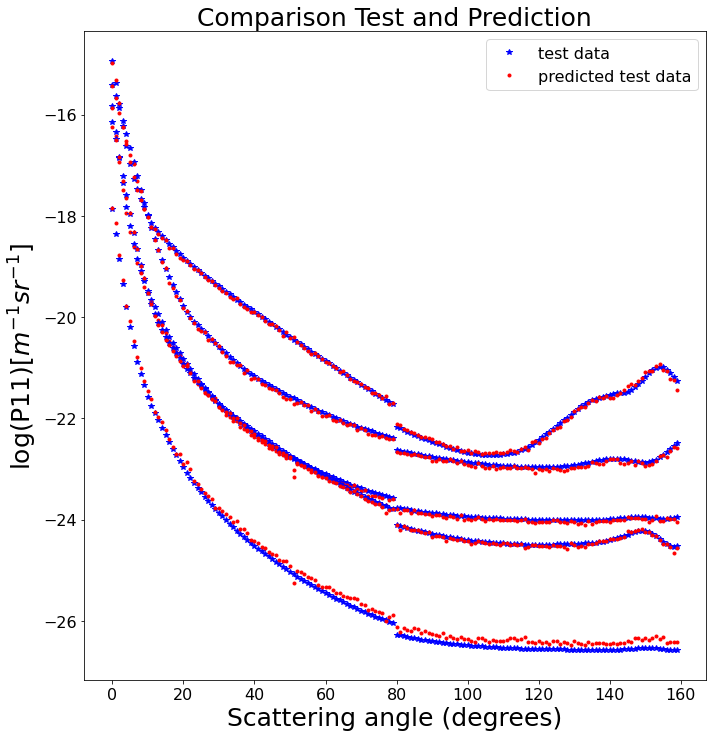

In [59]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(np.arange(0,len(P11_532_columns)),qoi_test[P11_532_columns].iloc[index],'b*')
    ax.plot(np.arange(0,len(P11_532_columns)),qoi_pred_fw[P11_532_columns].iloc[index],'r.')
    
    

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('log(P11)[$m^{-1}sr^{-1}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
ax.legend(['test data', 'predicted test data'], fontsize = 16)
fig.savefig(f'{plot_dir}/phase_data__result_iv.jpg')

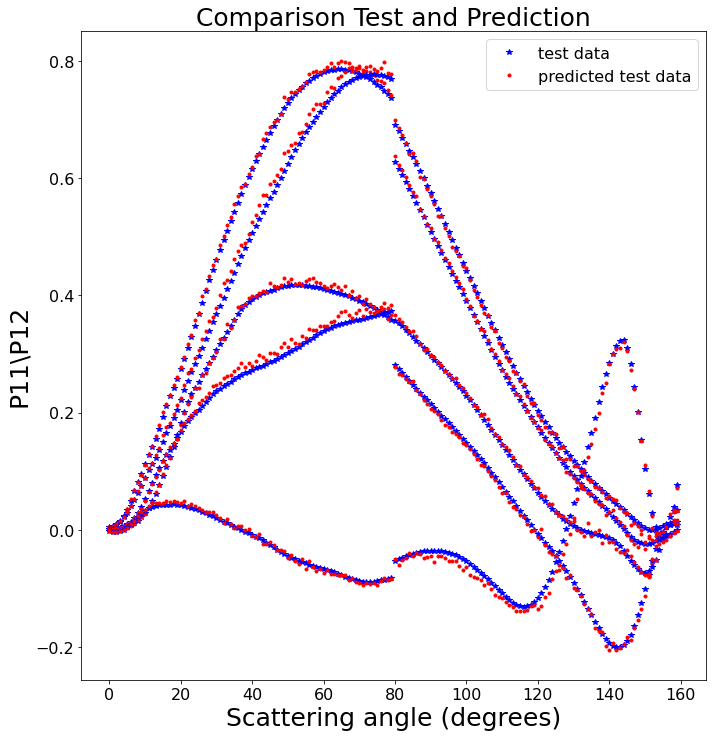

In [60]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(np.arange(0,len(P12_532_columns)),qoi_test[P12_532_columns].iloc[index],'b*')
    ax.plot(np.arange(0,len(P12_532_columns)),qoi_pred_fw[P12_532_columns].iloc[index],'r.')
    
    

ax.set_xlabel('Scattering angle (degrees)',fontsize = 25)
ax.set_ylabel('P11\P12',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 
ax.set_title( 'Comparison Test and Prediction',fontsize = 25)
ax.legend(['test data', 'predicted test data'], fontsize = 16)
fig.savefig(f'{plot_dir}/phase_data__result_iv.jpg')

# dvar

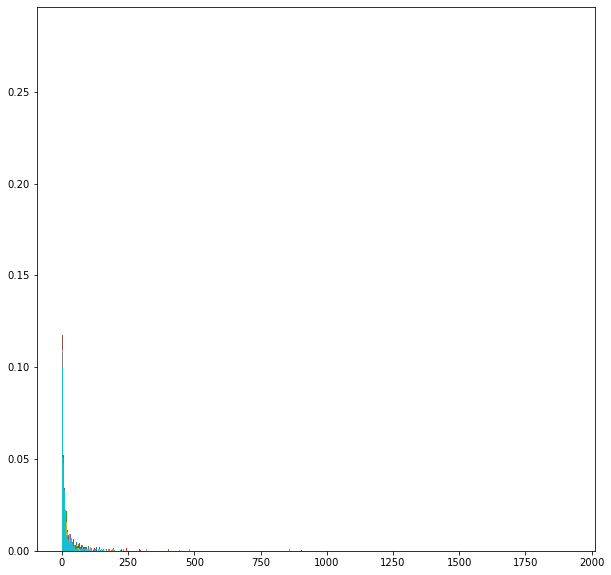

In [61]:
fig, ax = plt.subplots(figsize = (10,10))

x1data = []
x2data = []
y1data = []
y2data = []

for datapoint in presentation_plot_index:
    mu1 = dvar_pred_iv.iloc[datapoint]['R_median']
    sigma1 = dvar_pred_iv.iloc[datapoint]['GSD']
    mu2 = dvar_test.iloc[datapoint]['R_median']
    sigma2 = dvar_test.iloc[datapoint]['GSD']
    
    
    s1 = np.random.lognormal(mu1, sigma1, 10000)
    s2 = np.random.lognormal(mu2, sigma2, 10000)


    count1, bins1, ignored1 = plt.hist(s1, 10000, density=True, align='mid')
    count2, bins2, ignored2 = plt.hist(s2, 10000, density=True, align='mid')

    x1 = np.linspace(min(bins1), max(bins1), 100000)
    x2 = np.linspace(min(bins2), max(bins2), 100000)

    pdf1 = (np.exp(-(np.log(x1) - mu1)**2 / (2 * sigma1**2)) / (x1 * sigma1 * np.sqrt(2 * np.pi)))
    pdf2 = (np.exp(-(np.log(x2) - mu2)**2 / (2 * sigma2**2)) / (x2 * sigma2 * np.sqrt(2 * np.pi)))

    x1data.append(x1)
    x2data.append(x2)
    y1data.append(pdf1)
    y2data.append(pdf2)


0
1000
2000
5000


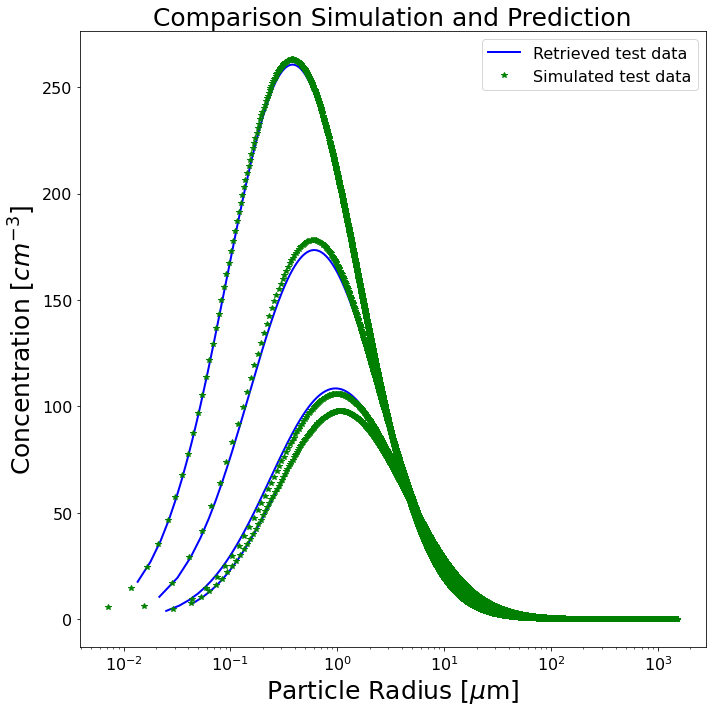

In [62]:
fig, ax = plt.subplots(figsize = (10,10))
for datalen in (0,1,2,3):
    print(presentation_plot_index[datalen])
     
    if datalen == 0:        
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1, label = 'Simulated test data')
    else:
        ax.plot(x1data[datalen], y1data[datalen]*1000,'b', linewidth=2)#,label ='Retrieved test data')
        ax.plot(x2data[datalen], y2data[datalen]*1000, '*g',linewidth=1)#, label = 'Simulated test data')
        
    
ax.legend(['Predicted test data', 'test data'], fontsize = 16)
ax.legend(fontsize = 16)   

ax.set_xlabel('Particle Radius [$\mu$m]',fontsize = 25)
ax.set_ylabel('Concentration [$cm^{-3}$]',fontsize = 25)
ax.tick_params(labelsize = 16)    
ax.set_title( 'Comparison Simulation and Prediction',fontsize = 25)
fig.align_labels()

plt.xscale('log')

fig.tight_layout() 
fig.savefig(f'{plot_dir}/GSD_GMR_iv.jpg')

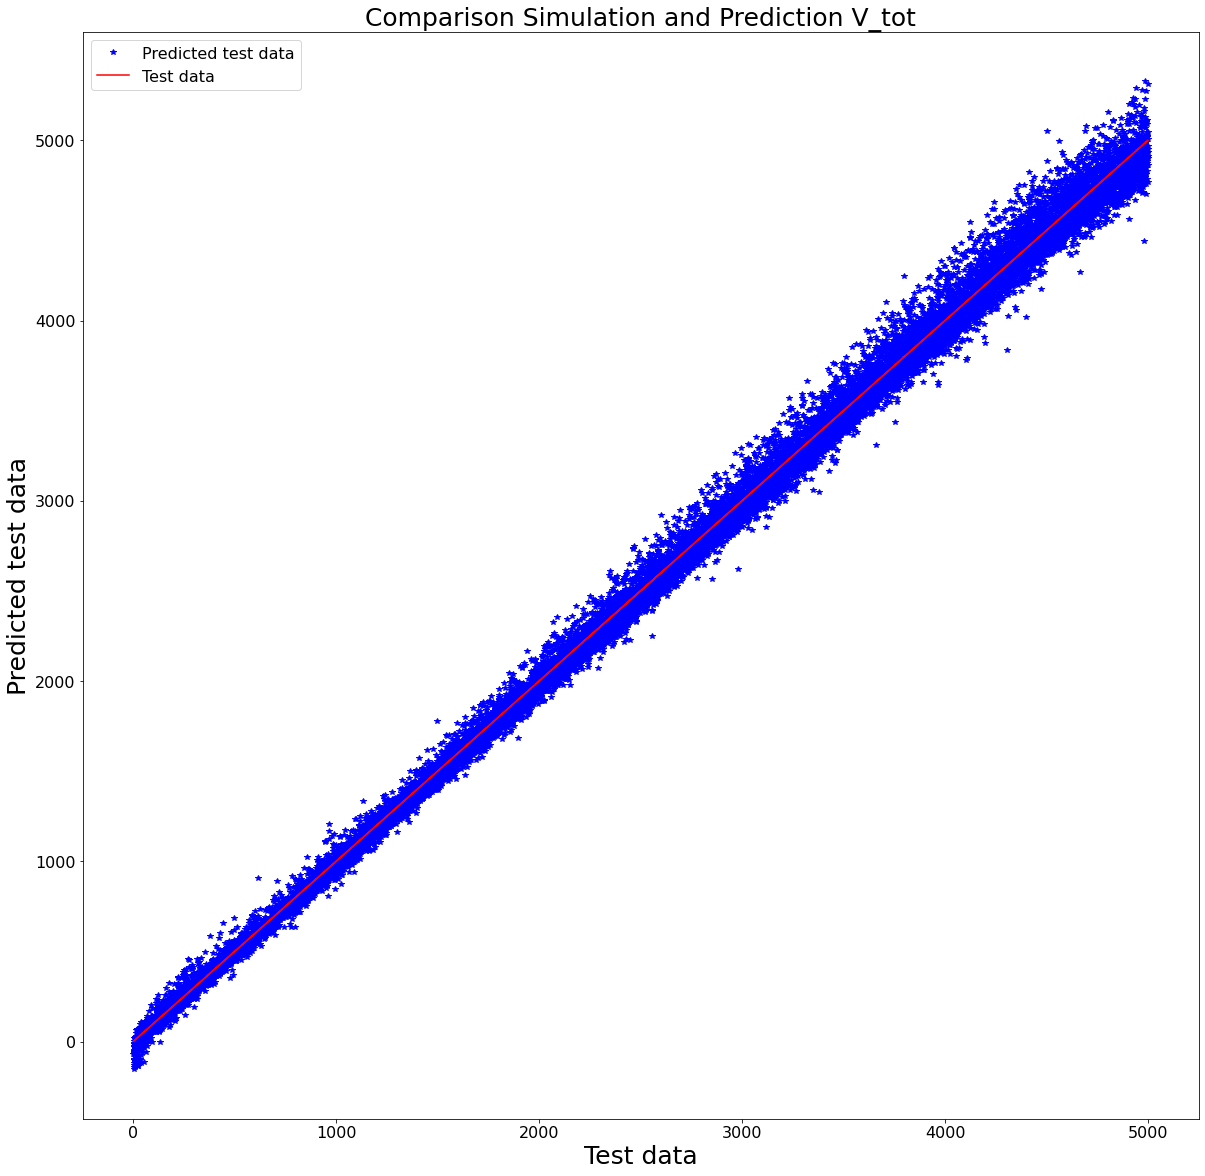

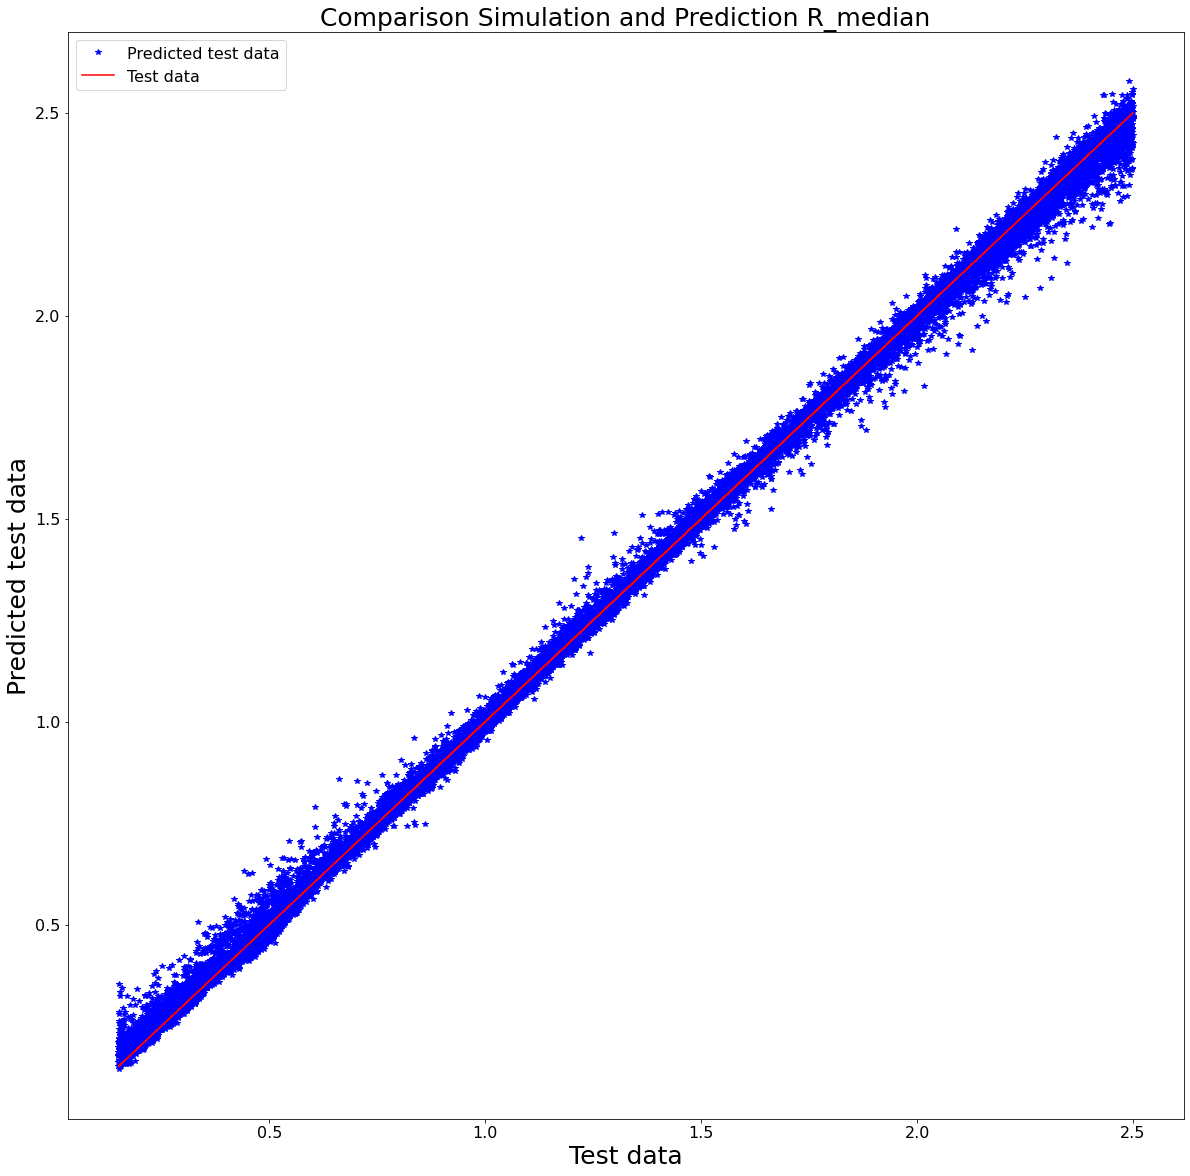

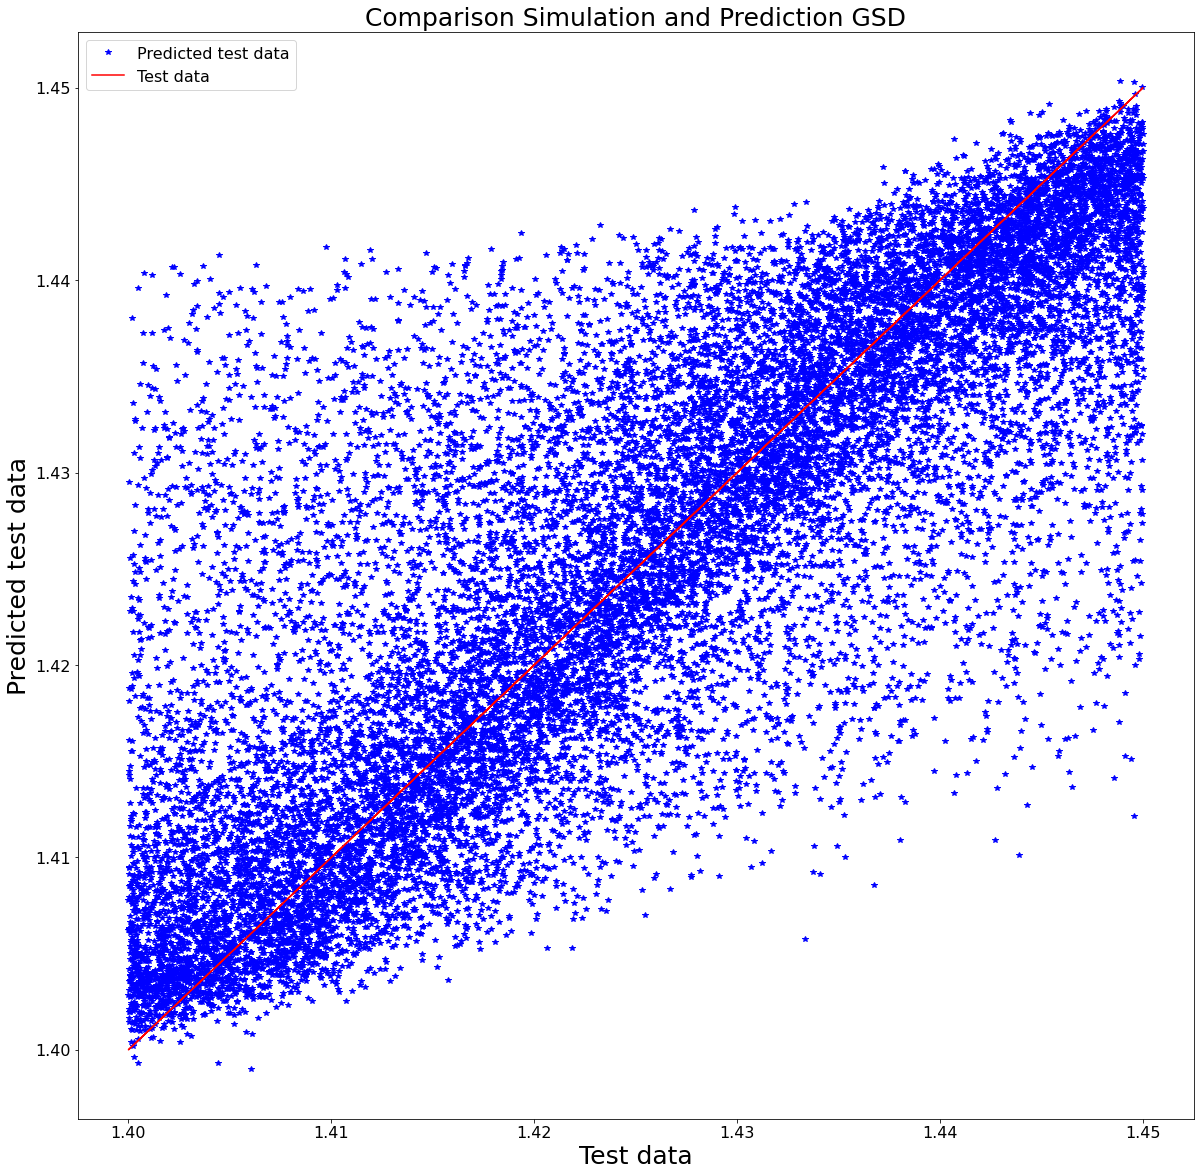

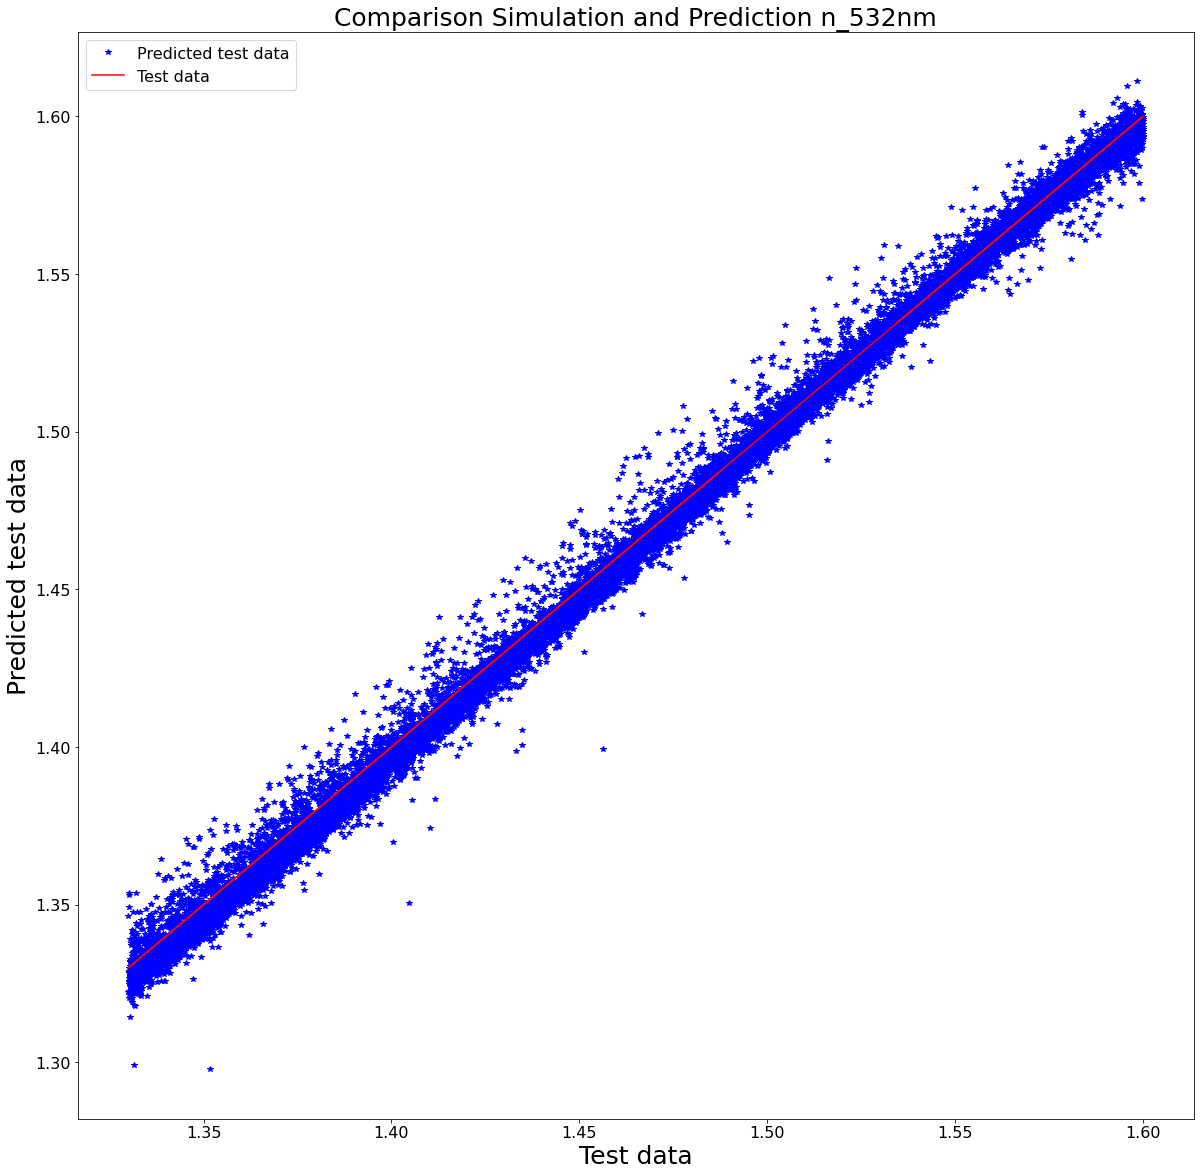

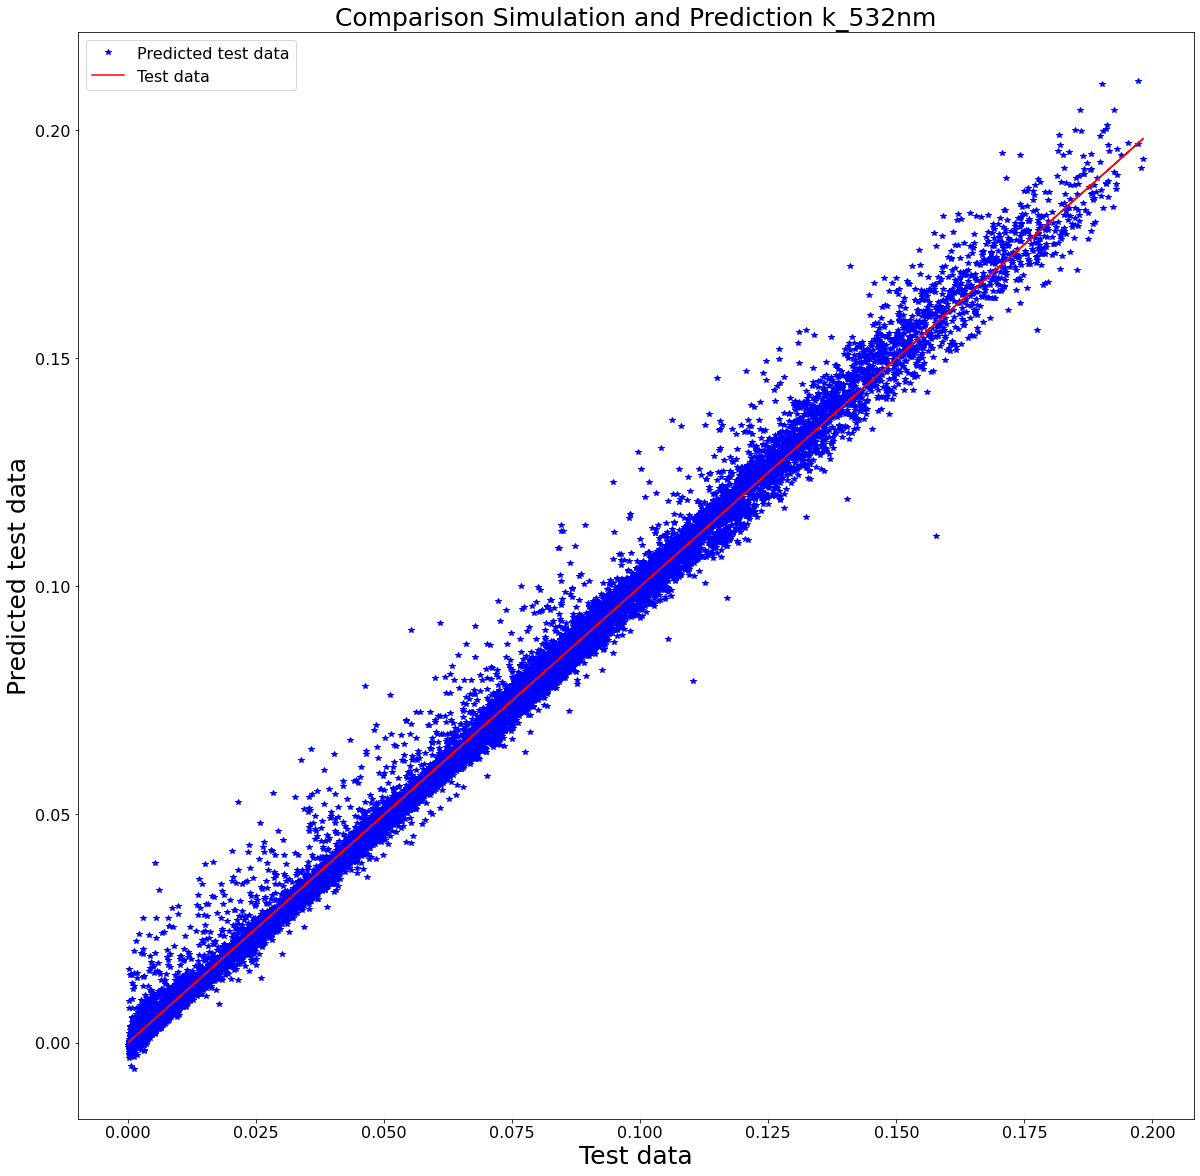

In [63]:
for key in dvar_test.columns:
    fig, ax = plt.subplots(figsize=(20,20))


    ax.plot(dvar_test[key],dvar_pred_iv[key],"b*",label = 'Predicted test data')
    ax.plot(dvar_test[key],dvar_test[key],'r',label = 'Test data')
    ax.set_xlabel('Test data',fontsize = 25)
    ax.set_ylabel('Predicted test data',fontsize = 25)
    ax.tick_params(labelsize = 16)    
    ax.set_title( 'Comparison Simulation and Prediction '+key,fontsize = 25)
    ax.legend(['Predicted test data', 'Test data'], fontsize = 16)
   # ax.legend(fontsize = 16)   

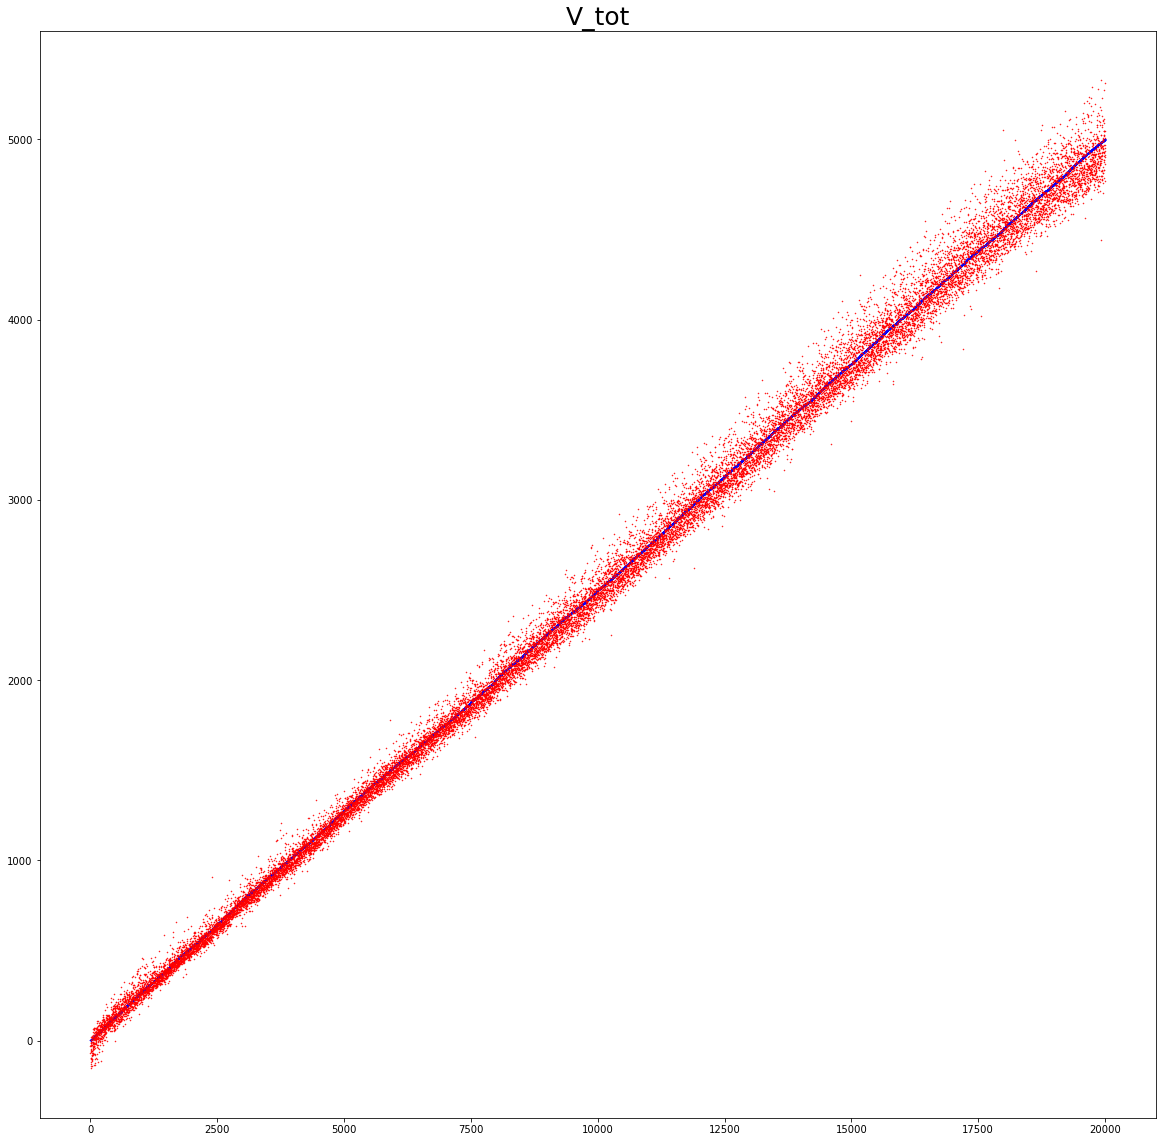

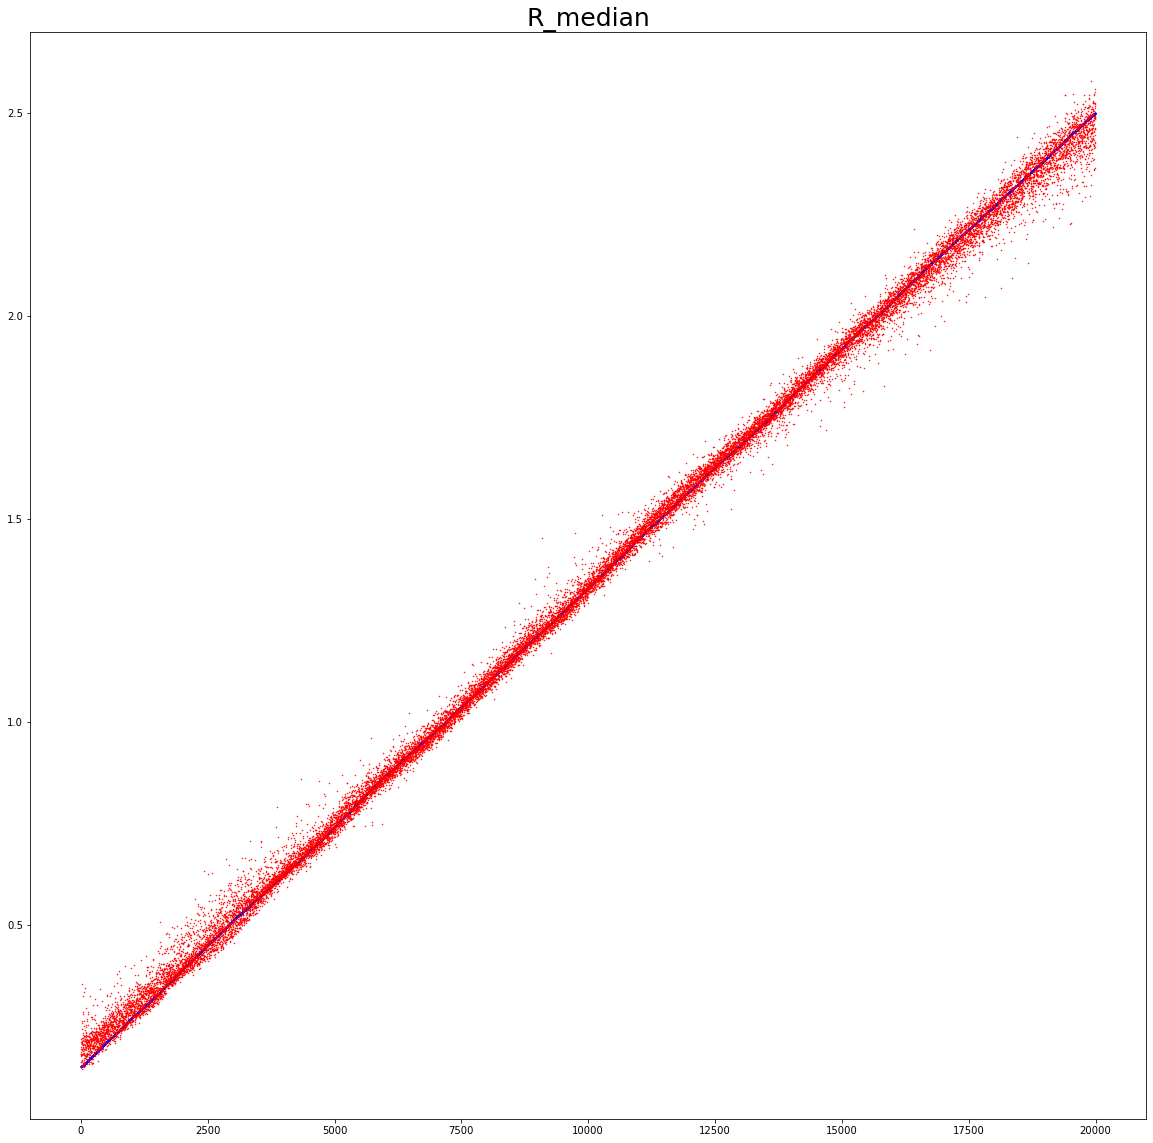

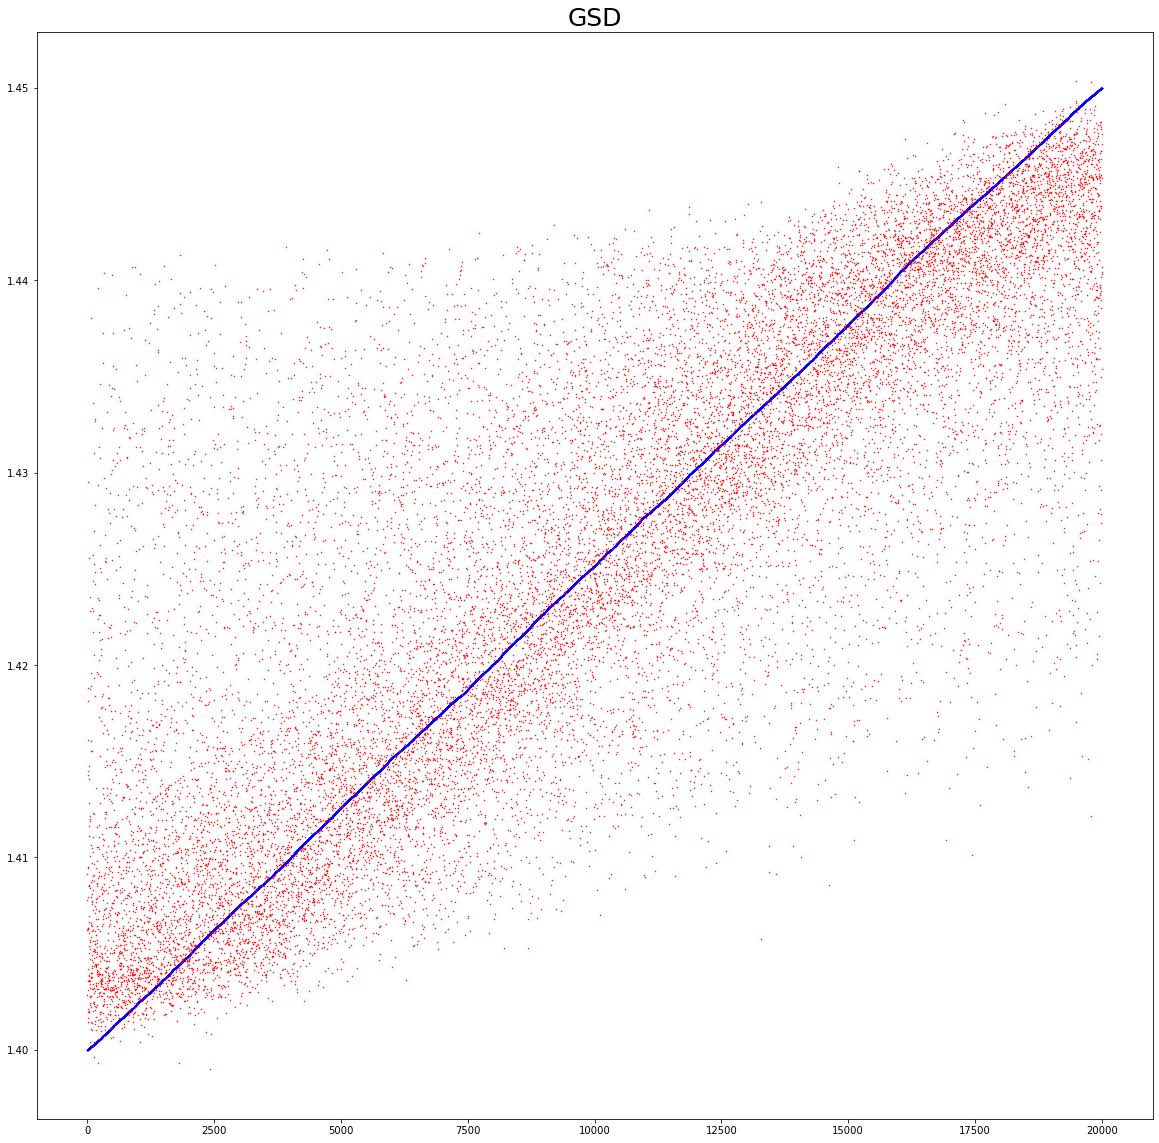

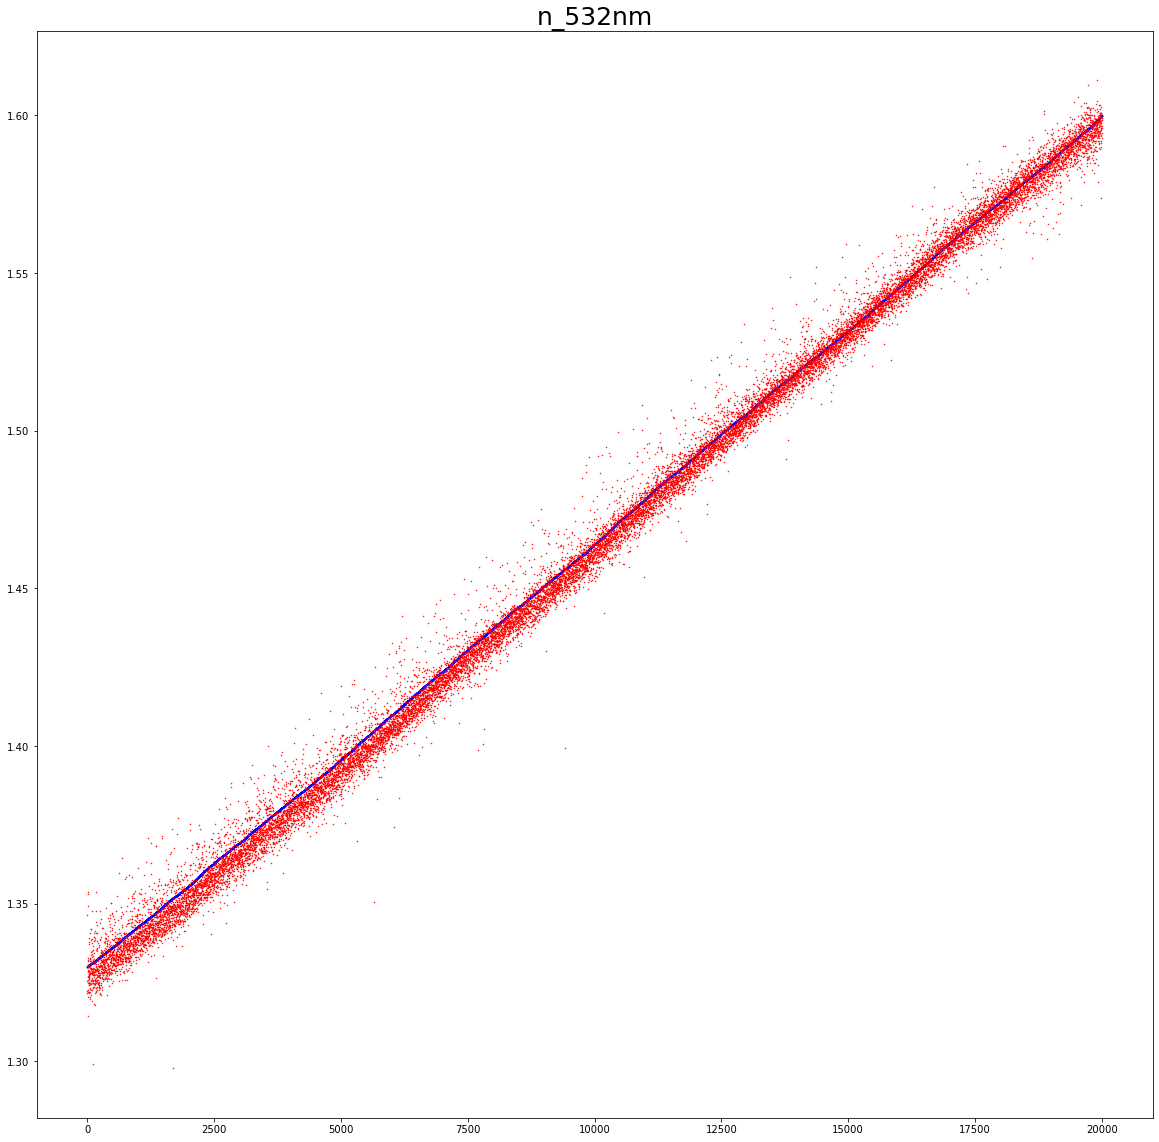

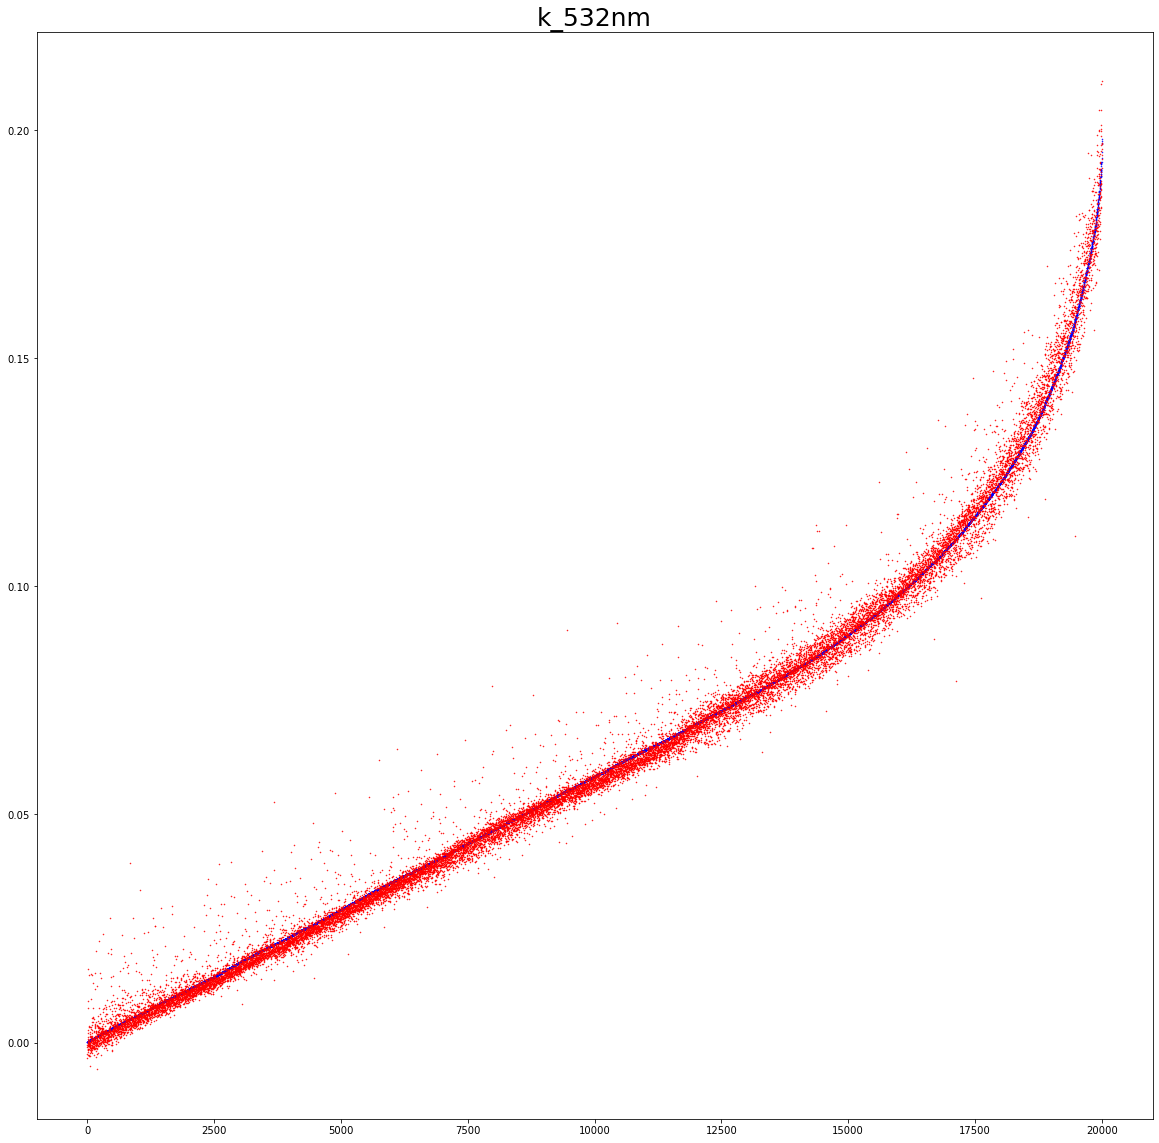

In [64]:
for key in dvar_test.columns:
    dvar_test_help = dvar_test.sort_values(key)
    dvar_pred_iv_df_help = dvar_pred_iv.loc[dvar_test_help.index]

    fig, ax = plt.subplots(figsize=(20, 20))
    ax.plot(np.arange(0,len(dvar_test_help)),dvar_test_help[key],'b.', markersize = '1')
    ax.plot(np.arange(0,len(dvar_pred_iv_df_help)),dvar_pred_iv_df_help[key],'r.', markersize = '1')
    ax.set_title(key, fontsize = 25)
    

# Mean absolute error

In [65]:
MAE_all_dvar = []
for col in dvar_test.keys():
    MAE = mean_absolute_error(dvar_test[col],dvar_pred_iv[col])
    col_mean = dvar_test[col].mean()
    col_p = MAE / col_mean *100
    MAE_all_dvar.append(col_p)
    print(col,'***',MAE,'***', col_mean,'***',col_p)
MAE_all_dvar = np.array(MAE_all_dvar)

V_tot *** 57.68653280945965 *** 2509.2233125206417 *** 2.2989796293383953
R_median *** 0.02001966855738957 *** 1.3304994005997064 *** 1.5046732488842873
GSD *** 0.006023610079468016 *** 1.4251207279214313 *** 0.42267366977768817
n_532nm *** 0.003905411434663401 *** 1.4643221701464175 *** 0.26670438475113023
k_532nm *** 0.0021904878182475856 *** 0.06318201588428435 *** 3.4669482883537417


In [66]:
MAE_all_dvar.min()

0.26670438475113023

In [67]:
MAE_all_dvar.max()

3.4669482883537417

In [68]:
MAE_all_p = []
for col in qoi_test.keys():
    MAE = mean_absolute_error(qoi_test[col],qoi_pred_fw[col])
    col_mean = qoi_test[col].mean()
    col_p = MAE / col_mean *100
    MAE_all_p.append(col_p)
    print(col,'***',MAE,'***', col_mean,'***',col_p)
MAE_all_p = np.array(MAE_all_p)

P11_0.532_5 *** 0.061136116077070826 *** -15.737315936702773 *** -0.3884786727480534
P11_0.532_6 *** 0.04631228337736976 *** -16.028800359914023 *** -0.2889316875715219
P11_0.532_7 *** 0.04383359661159659 *** -16.327531387209337 *** -0.2684643230631604
P11_0.532_8 *** 0.07436203123259913 *** -16.622693007332145 *** -0.44735249095798496
P11_0.532_9 *** 0.06287137089384082 *** -16.90855115775083 *** -0.3718318045542345
P11_0.532_10 *** 0.05104230952731972 *** -17.165821403672762 *** -0.29734848293597427
P11_0.532_11 *** 0.051881212082299885 *** -17.41793536839621 *** -0.2978608599985691
P11_0.532_12 *** 0.04749201623442207 *** -17.640659230198448 *** -0.2692190559019591
P11_0.532_13 *** 0.042378950353857275 *** -17.843089390351185 *** -0.23750904020451796
P11_0.532_14 *** 0.04968197020919985 *** -18.026383616920224 *** -0.2756069728959198
P11_0.532_15 *** 0.0426763237102397 *** -18.207672561796468 *** -0.23438648495790515
P11_0.532_16 *** 0.040444480435832625 *** -18.36576753885313 *** -

P11_0.532_119 *** 0.032613400753719386 *** -22.94248401070387 *** -0.1421528755931726
P11_0.532_120 *** 0.037314953177622005 *** -22.950566210246336 *** -0.16258837727917427
P11_0.532_121 *** 0.036220427547991145 *** -22.95780377072096 *** -0.15776956676572243
P11_0.532_122 *** 0.03373778167745521 *** -22.964179357962983 *** -0.14691481525011
P11_0.532_123 *** 0.03264563411224994 *** -22.969687800735947 *** -0.1421248490421536
P11_0.532_124 *** 0.03269764017995948 *** -22.97433510097398 *** -0.14232246563937898
P11_0.532_125 *** 0.034896952962011604 *** -22.978136619100926 *** -0.15187024753348788
P11_0.532_126 *** 0.03389879737765456 *** -22.981113454125158 *** -0.1475072017085824
P11_0.532_127 *** 0.033579980020566946 *** -22.983291289787495 *** -0.14610605416417463
P11_0.532_128 *** 0.03871657947757189 *** -22.98469278483801 *** -0.16844505967515702
P11_0.532_129 *** 0.03934428089531411 *** -22.98533330457044 *** -0.1711712437404196
P11_0.532_130 *** 0.03819752335759585 *** -22.9852

P12_0.532_59 *** 0.007433576675513995 *** 0.233474407587085 *** 3.1838935806021063
P12_0.532_60 *** 0.007402884933215742 *** 0.23496869936173997 *** 3.1505834408262277
P12_0.532_61 *** 0.01150679255960542 *** 0.23633229346703497 *** 4.868904029491194
P12_0.532_62 *** 0.010267187730905604 *** 0.2375695434192 *** 4.3217609391910905
P12_0.532_63 *** 0.008258234243128897 *** 0.238682606457474 *** 3.459922935188938
P12_0.532_64 *** 0.008755685635270752 *** 0.23967161976459997 *** 3.6532008436670087
P12_0.532_65 *** 0.007985038674975454 *** 0.240535986628605 *** 3.3196856682009086
P12_0.532_66 *** 0.00844296974916481 *** 0.24127543071202498 *** 3.499307709968174
P12_0.532_67 *** 0.009413691753038543 *** 0.24189091959779999 *** 3.891709440226611
P12_0.532_68 *** 0.008239684882157552 *** 0.24238517979785001 *** 3.3994177734090325
P12_0.532_69 *** 0.01032895203877497 *** 0.24276252293754996 *** 4.254755599748016
P12_0.532_70 *** 0.011820067747226605 *** 0.24302759721055 *** 4.863673049026667
P1

P12_0.532_173 *** 0.008634678344760931 *** -0.056388599159940996 *** -15.31280874750847
P12_0.532_174 *** 0.007460419460422397 *** -0.042742830485349 *** -17.454200799780004
P12_0.532_175 *** 0.005607098348237108 *** -0.02945882758828 *** -19.033677872733314


In [69]:
MAE_all_p.min()

-124.72147877227837

In [70]:
MAE_all_p.max()

616.702558805953

# Root mean squared error

In [71]:
MAE_dvar_p = []
for col in dvar_test.keys():
    MAE = np.sqrt(mean_squared_error(dvar_test[col],dvar_pred_iv[col]))
    col_mean = dvar_test[col].mean()
    col_p = MAE / col_mean *100
    MAE_dvar_p.append(col_p)
    print(col,'***',MAE,'***', col_mean,'***',col_p)
MAE_dvar_p = pd.DataFrame(MAE_dvar_p,index = dvar_test.keys()).T

V_tot *** 78.9951131553405 *** 2509.2233125206417 *** 3.1481898307403307
R_median *** 0.029291385008335932 *** 1.3304994005997064 *** 2.2015331232117203
GSD *** 0.008585331603924957 *** 1.4251207279214313 *** 0.6024283722577556
n_532nm *** 0.005196319324915518 *** 1.4643221701464175 *** 0.3548617531615968
k_532nm *** 0.0035174084211435017 *** 0.06318201588428435 *** 5.567103822052009


In [72]:
MAE_dvar_p

V_tot  R_median       GSD   n_532nm   k_532nm
0  3.14819  2.201533  0.602428  0.354862  5.567104

In [73]:
MAE_all_p = []
for col in qoi_test.keys():
    MAE = np.sqrt(abs(mean_squared_error(qoi_test[col],qoi_pred_fw[col])))
    col_mean = qoi_test[col].mean()
    col_p = MAE / col_mean *100
    MAE_all_p.append(col_p)
    print(col,'***',MAE,'***', col_mean,'***',col_p)
MAE_all_p = np.array(MAE_all_p)
print(MAE_all_p.min())
print(MAE_all_p.max())

P11_0.532_5 *** 0.0904259097237567 *** -15.737315936702773 *** -0.5745955033721108
P11_0.532_6 *** 0.07356054260678893 *** -16.028800359914023 *** -0.4589273118077784
P11_0.532_7 *** 0.06979608308952923 *** -16.327531387209337 *** -0.42747480580074765
P11_0.532_8 *** 0.09381499731806871 *** -16.622693007332145 *** -0.5643790526401926
P11_0.532_9 *** 0.08485071634154853 *** -16.90855115775083 *** -0.5018213302246965
P11_0.532_10 *** 0.07528059542225399 *** -17.165821403672762 *** -0.4385493338882526
P11_0.532_11 *** 0.0792718073531489 *** -17.41793536839621 *** -0.4551159806057312
P11_0.532_12 *** 0.07257889778970984 *** -17.640659230198448 *** -0.4114296231371245
P11_0.532_13 *** 0.06680833780515598 *** -17.843089390351185 *** -0.37442135912452024
P11_0.532_14 *** 0.0760802338405329 *** -18.026383616920224 *** -0.42204934421300794
P11_0.532_15 *** 0.07001582095889183 *** -18.207672561796468 *** -0.38454020260557503
P11_0.532_16 *** 0.07026471153034929 *** -18.36576753885313 *** -0.3825

P11_0.532_132 *** 0.07127271667524983 *** -22.982606453273405 *** -0.31011589925692906
P11_0.532_133 *** 0.06274779007313692 *** -22.97998647565415 *** -0.2730540774669918
P11_0.532_134 *** 0.06325504179831008 *** -22.97633849296928 *** -0.2753051441058201
P11_0.532_135 *** 0.07653650040236572 *** -22.971514905756024 *** -0.33318003064389884
P11_0.532_136 *** 0.06604998170247788 *** -22.965379210990797 *** -0.2876067540433541
P11_0.532_137 *** 0.06283029230615077 *** -22.95786172497797 *** -0.2736765865167308
P11_0.532_138 *** 0.06406580695131577 *** -22.949010108886064 *** -0.27916588405052345
P11_0.532_139 *** 0.06342308957602064 *** -22.93900848212744 *** -0.2764857497020227
P11_0.532_140 *** 0.06681949079297617 *** -22.928142672625253 *** -0.2914300200720331
P11_0.532_141 *** 0.06202321690111962 *** -22.916711709740234 *** -0.2706462326999473
P11_0.532_142 *** 0.06683541335036706 *** -22.904909016432 *** -0.2917951488146898
P11_0.532_143 *** 0.0718655418243086 *** -22.8927179059799

P12_0.532_60 *** 0.010460194288115909 *** 0.23496869936173997 *** 4.4517394514799555
P12_0.532_61 *** 0.013920882234505284 *** 0.23633229346703497 *** 5.890385114231988
P12_0.532_62 *** 0.013082613985276928 *** 0.2375695434192 *** 5.506856559551569
P12_0.532_63 *** 0.011031230924378585 *** 0.238682606457474 *** 4.621715460587622
P12_0.532_64 *** 0.011665216827843676 *** 0.23967161976459997 *** 4.867166516962245
P12_0.532_65 *** 0.010741099821403843 *** 0.240535986628605 *** 4.465485589891559
P12_0.532_66 *** 0.011076076153691796 *** 0.24127543071202498 *** 4.590635739828677
P12_0.532_67 *** 0.012321683125648979 *** 0.24189091959779999 *** 5.093900649985807
P12_0.532_68 *** 0.011492473129575248 *** 0.24238517979785001 *** 4.741409165015784
P12_0.532_69 *** 0.013117452935064835 *** 0.24276252293754996 *** 5.40340937980747
P12_0.532_70 *** 0.013956880929955314 *** 0.24302759721055 *** 5.742920182790432
P12_0.532_71 *** 0.013311792289339014 *** 0.24318459200303497 *** 5.473945606378253
P12

# explained variance score

In [74]:
explained_variance_score

<function sklearn.metrics._regression.explained_variance_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>

In [75]:
EVS_dvar = []
for col in dvar_test.keys():
    EVS = explained_variance_score(dvar_test[col],dvar_pred_iv[col])
    EVS_dvar.append(EVS)
EVS_dvar = pd.DataFrame(EVS_dvar,index = dvar_test.keys()).T
EVS_dvar

V_tot  R_median       GSD   n_532nm   k_532nm
0  0.997013  0.998162  0.652231  0.996154  0.992985

In [76]:
EVS_all = []
for col in qoi_test.keys():
    EVS = explained_variance_score(qoi_test[col],qoi_pred_fw[col])
    print(col,'***',EVS)
    EVS_all.append(EVS)


P11_0.532_5 *** 0.993264944735711
P11_0.532_6 *** 0.9953586060255926
P11_0.532_7 *** 0.9963967264591459
P11_0.532_8 *** 0.9966567225220645
P11_0.532_9 *** 0.9969248995530823
P11_0.532_10 *** 0.9972301270437249
P11_0.532_11 *** 0.9975552804227432
P11_0.532_12 *** 0.997770166344784
P11_0.532_13 *** 0.998183075042445
P11_0.532_14 *** 0.9978235775073897
P11_0.532_15 *** 0.9982372097543829
P11_0.532_16 *** 0.9982506092755902
P11_0.532_17 *** 0.9973660486196679
P11_0.532_18 *** 0.9980900914407107
P11_0.532_19 *** 0.9985636057340121
P11_0.532_20 *** 0.9984708932636972
P11_0.532_21 *** 0.9980888380082389
P11_0.532_22 *** 0.9985104404462949
P11_0.532_23 *** 0.9985999962474624
P11_0.532_24 *** 0.9985866163667643
P11_0.532_25 *** 0.998720131478409
P11_0.532_26 *** 0.9977067125217979
P11_0.532_27 *** 0.9976446441815735
P11_0.532_28 *** 0.9986428308232873
P11_0.532_29 *** 0.9983675895186426
P11_0.532_30 *** 0.9986982843963595
P11_0.532_31 *** 0.9984220459529699
P11_0.532_32 *** 0.9986169676501889
P

P12_0.532_130 *** 0.9979921483453842
P12_0.532_131 *** 0.9979975609369715
P12_0.532_132 *** 0.9980882759544234
P12_0.532_133 *** 0.9982060908276154
P12_0.532_134 *** 0.9979840297778658
P12_0.532_135 *** 0.9977964924487697
P12_0.532_136 *** 0.9975031603540196
P12_0.532_137 *** 0.9950323379002892
P12_0.532_138 *** 0.9973498551563453
P12_0.532_139 *** 0.9971319588695479
P12_0.532_140 *** 0.9971643098327908
P12_0.532_141 *** 0.9974129826886476
P12_0.532_142 *** 0.9968474274962169
P12_0.532_143 *** 0.996821360252015
P12_0.532_144 *** 0.99686501265016
P12_0.532_145 *** 0.9959932314225184
P12_0.532_146 *** 0.9967313031878806
P12_0.532_147 *** 0.9966956712151274
P12_0.532_148 *** 0.9970138110874036
P12_0.532_149 *** 0.9973966830064348
P12_0.532_150 *** 0.9962955167353342
P12_0.532_151 *** 0.9972977375344597
P12_0.532_152 *** 0.9972583089121523
P12_0.532_153 *** 0.9970146147284817
P12_0.532_154 *** 0.9968718631641803
P12_0.532_155 *** 0.9972221366371169
P12_0.532_156 *** 0.9963275263492087
P12_

In [77]:
EVS_all_df = pd.DataFrame(EVS_all).T
EVS_all_df.columns = qoi_test.columns
EVS_all_df

P11_0.532_5  P11_0.532_6  P11_0.532_7  P11_0.532_8  P11_0.532_9  \
0     0.993265     0.995359     0.996397     0.996657     0.996925   

   P11_0.532_10  P11_0.532_11  P11_0.532_12  P11_0.532_13  P11_0.532_14  ...  \
0       0.99723      0.997555       0.99777      0.998183      0.997824  ...   

   P12_0.532_166  P12_0.532_167  P12_0.532_168  P12_0.532_169  P12_0.532_170  \
0        0.99395       0.992414       0.992217       0.986807       0.988648   

   P12_0.532_171  P12_0.532_172  P12_0.532_173  P12_0.532_174  P12_0.532_175  
0       0.987147       0.982759       0.981059       0.978364       0.981524  

[1 rows x 320 columns]

In [78]:
EVS_all_df.sort_values(by=EVS_all_df.index[0], axis = 1,ascending=True)


P12_0.532_174  P12_0.532_173  P12_0.532_175  P12_0.532_172  P12_0.532_169  \
0       0.978364       0.981059       0.981524       0.982759       0.986807   

   P12_0.532_171  P12_0.532_170  P12_0.532_168  P12_0.532_167  P11_0.532_5  \
0       0.987147       0.988648       0.992217       0.992414     0.993265   

   ...  P12_0.532_70  P12_0.532_66  P12_0.532_58  P12_0.532_45  P12_0.532_52  \
0  ...      0.999018      0.999042      0.999058      0.999073      0.999084   

   P12_0.532_36  P12_0.532_55  P12_0.532_44  P12_0.532_53  P12_0.532_43  
0      0.999087       0.99909      0.999124       0.99917      0.999216  

[1 rows x 320 columns]

# plot correlation test data and predicted test data

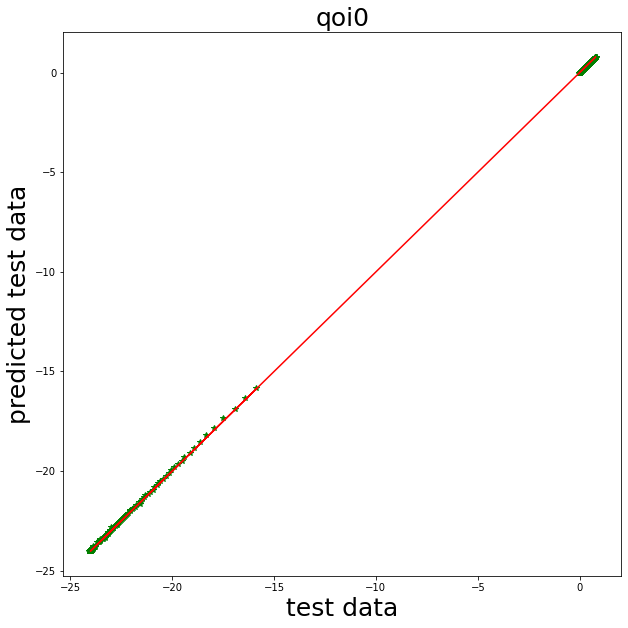

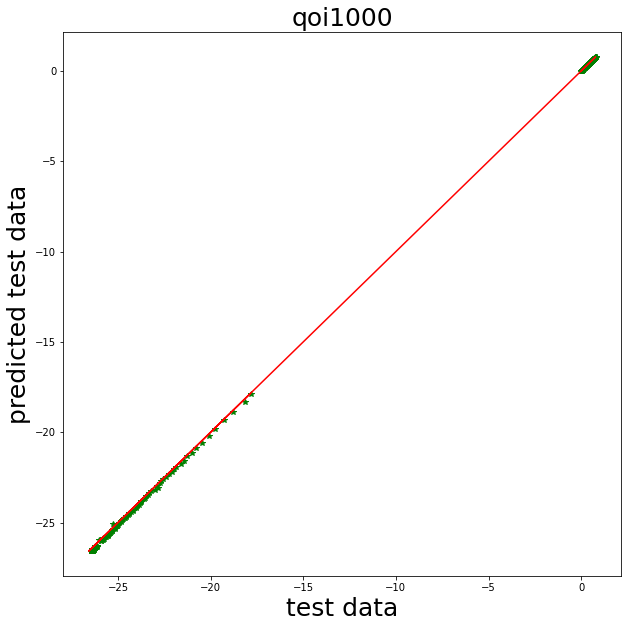

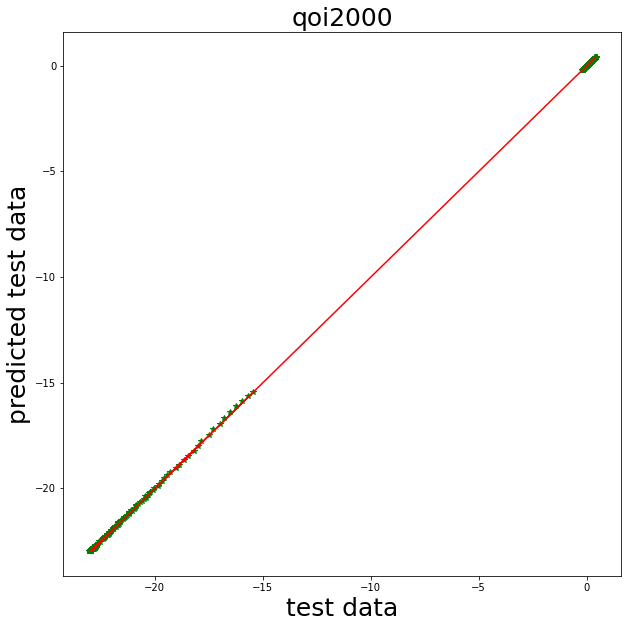

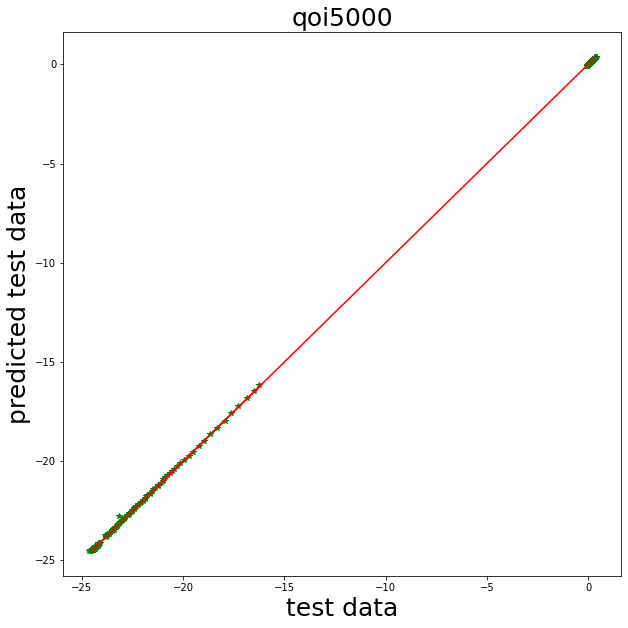

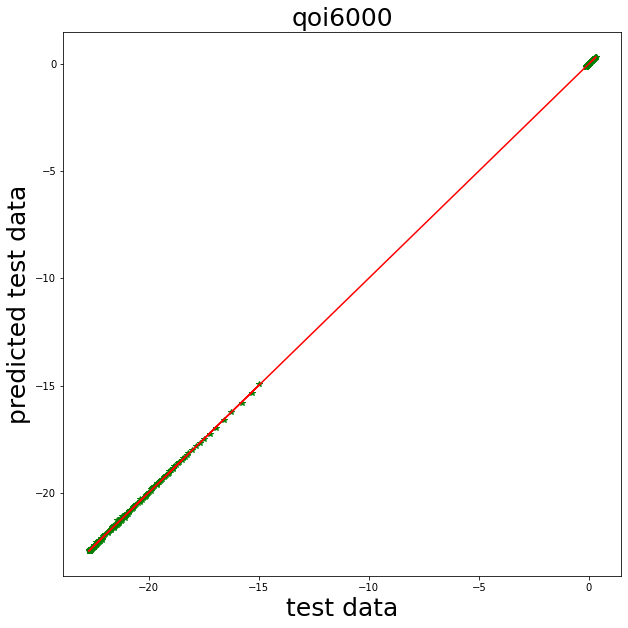

In [79]:
for index in presentation_plot_index:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(qoi_pred_fw.iloc[index],qoi_test.iloc[index],'g*')
    ax.plot(qoi_test.iloc[index],qoi_test.iloc[index],'r')
    ax.set_title('qoi'+str(index), fontsize = 25)
    ax.set_xlabel('test data',fontsize = 25)
    ax.set_ylabel('predicted test data',fontsize = 25)

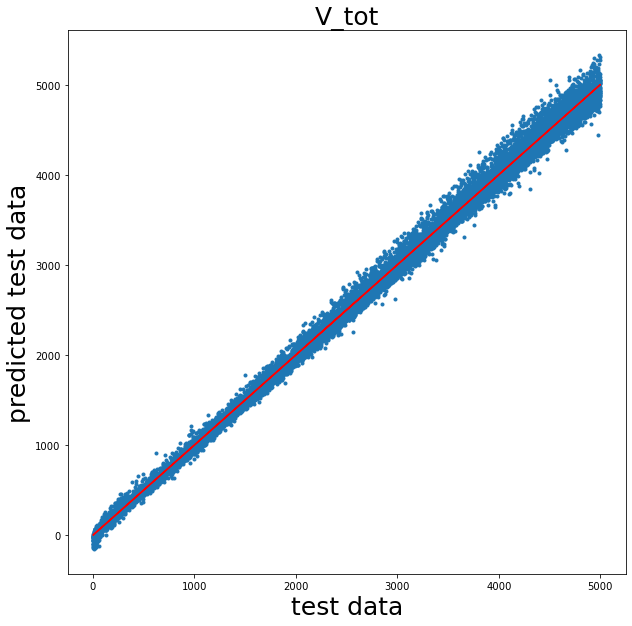

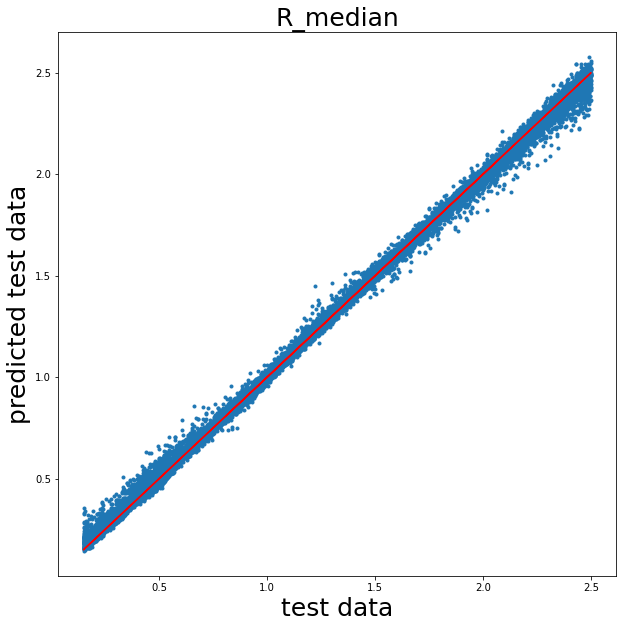

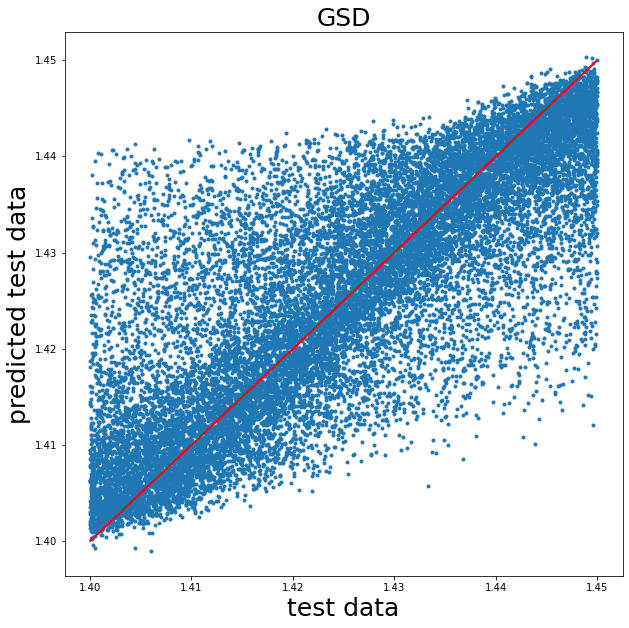

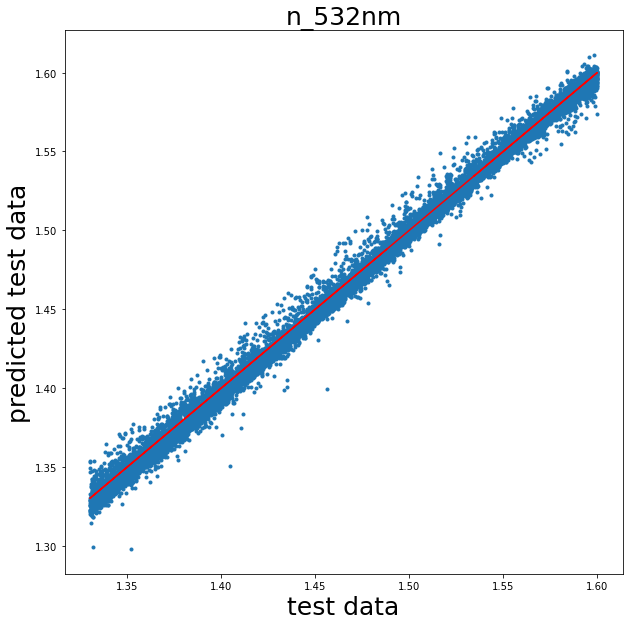

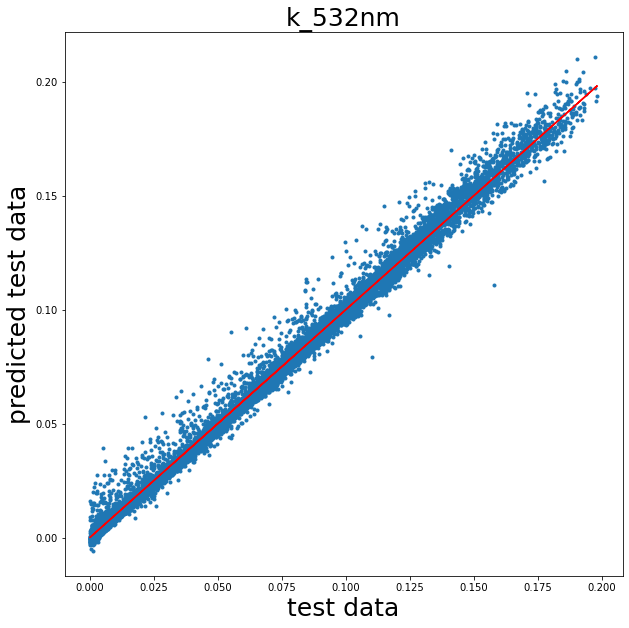

In [80]:
for key in dvar_columns:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.plot(dvar_test[key],dvar_pred_iv[key],".")
    ax.plot(dvar_test[key],dvar_test[key],"r")
    ax.set_title(key, fontsize = 25)
    ax.set_xlabel('test data',fontsize = 25)
    ax.set_ylabel('predicted test data',fontsize = 25)

# plot r2 for forward and inverse model

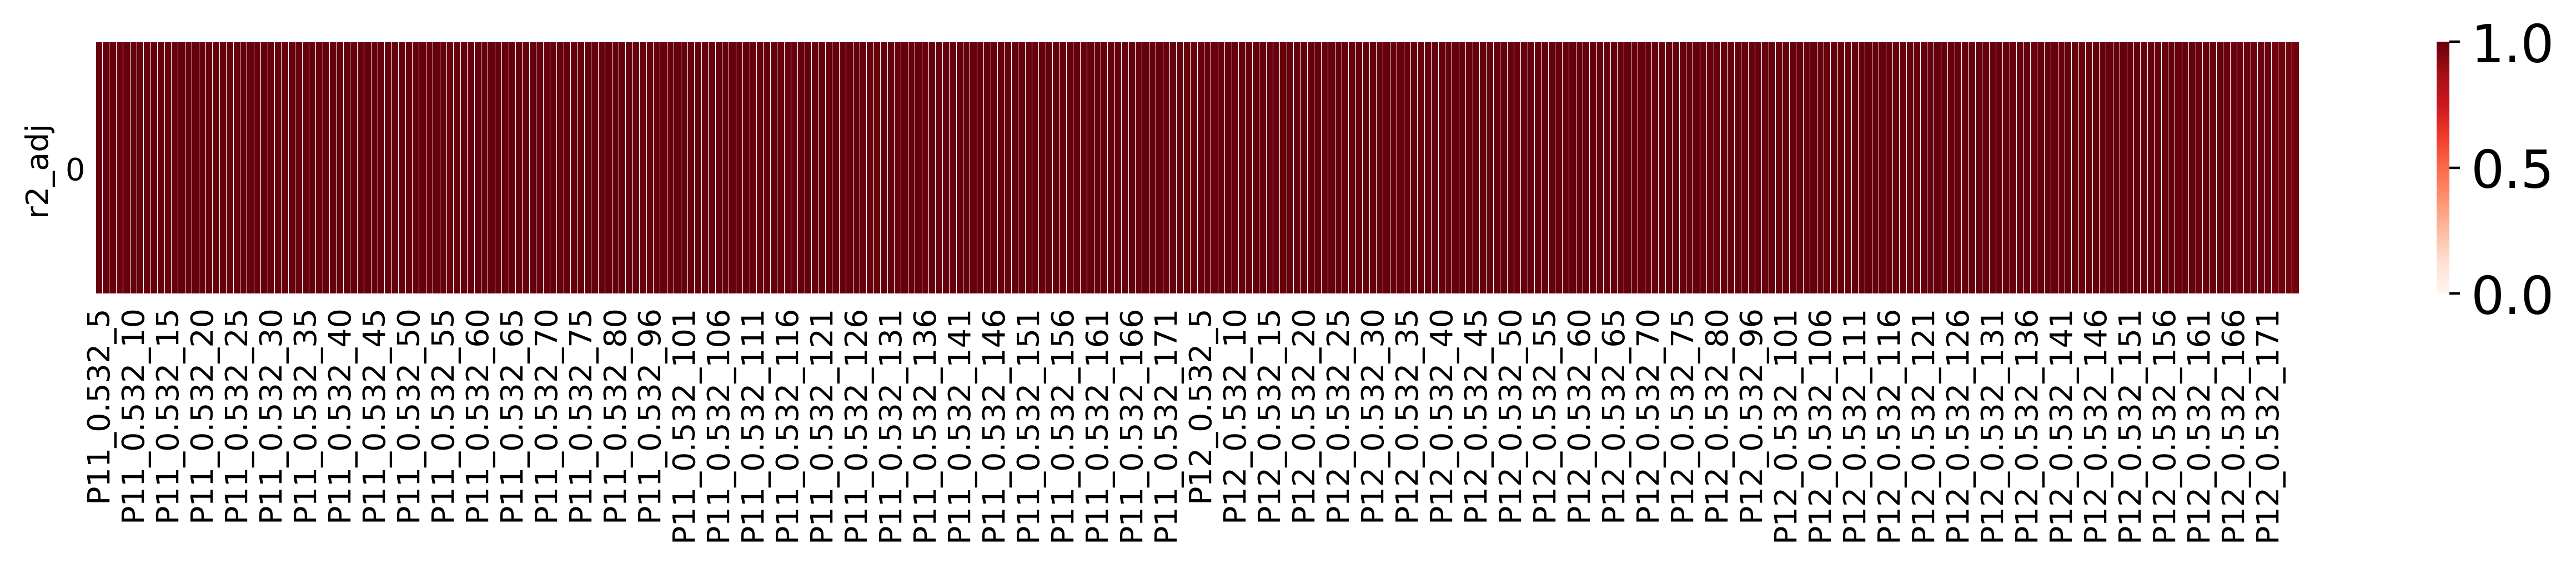

In [81]:
fig, ax = plt.subplots(figsize=(16, 1.5), dpi=400)

sns.heatmap(r2_adj_fw,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
ax.set_ylabel('r2_adj')

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

fig.savefig(f'{plot_dir}/invertible_model_fw_r2_adj.jpg')


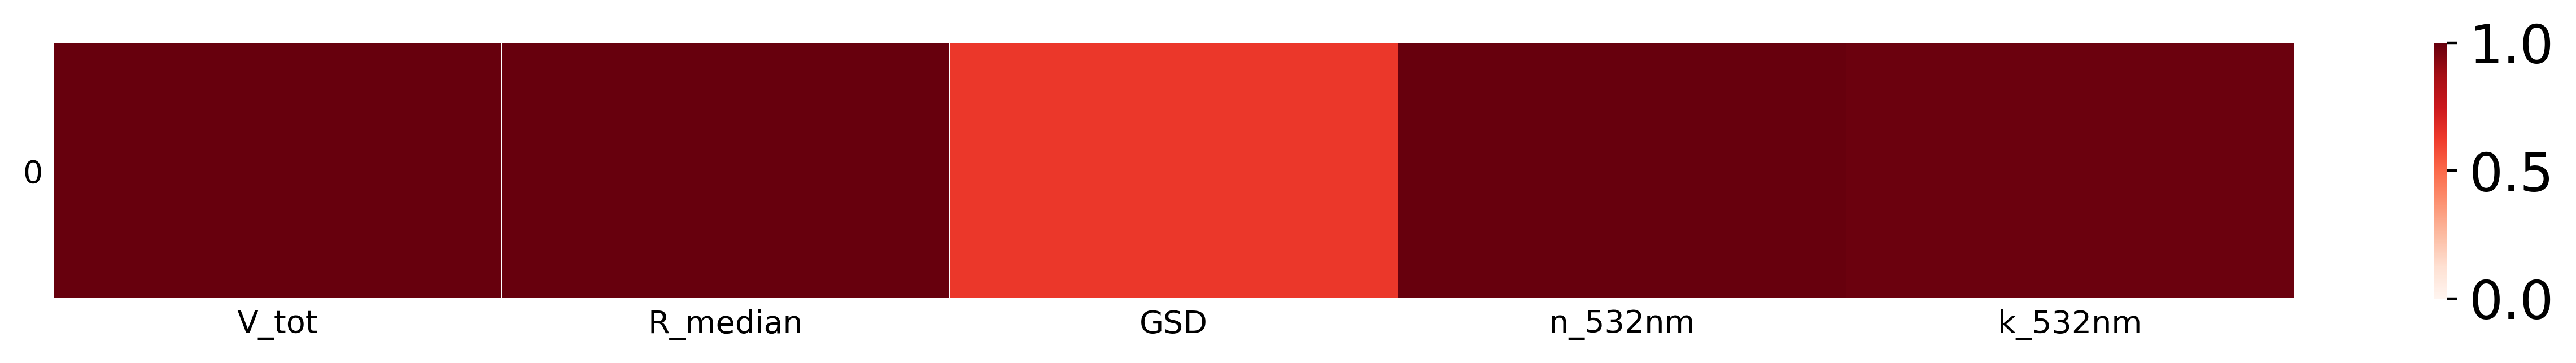

In [82]:
fig, ax = plt.subplots(figsize=(16, 1.5), dpi=400)

sns.heatmap(r2_adj_iv,
            cmap='Reds',
       #     annot=False,
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
      #      annot_kws={'fontsize': 20},
#            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

#fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/invertible_model_inv_r2_adj.jpg')



# Plot Relative Errors

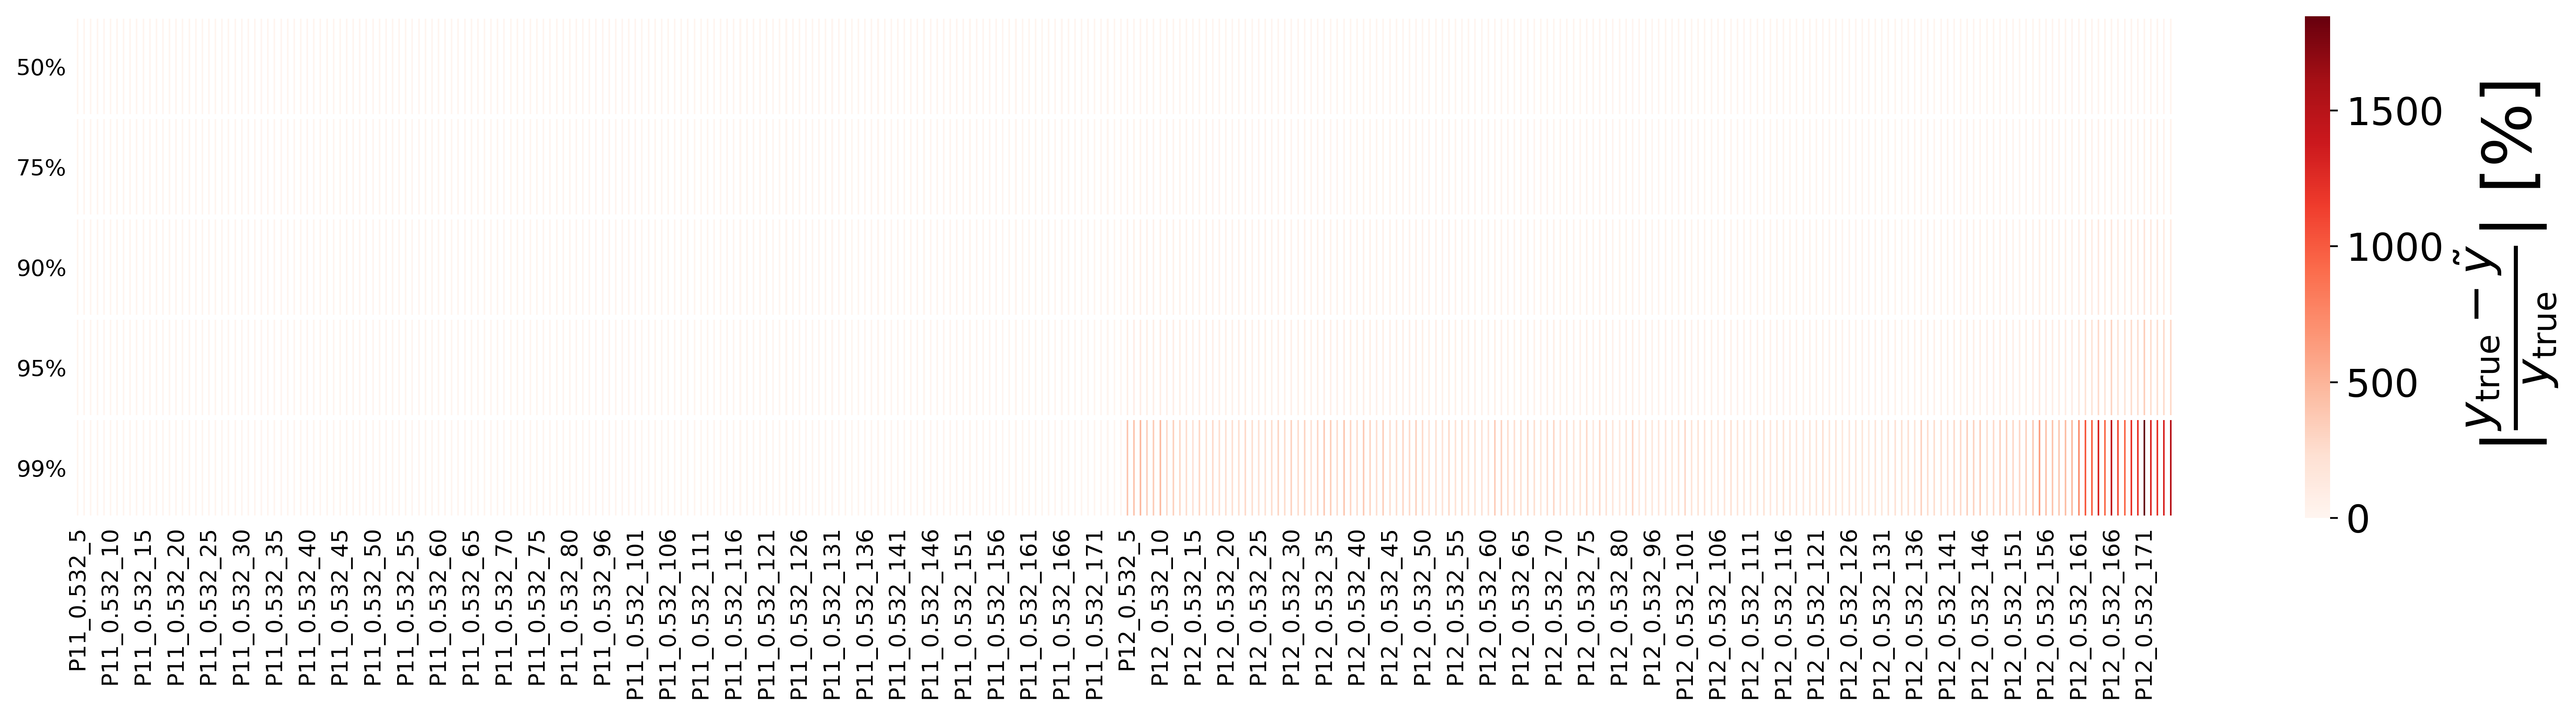

In [83]:
fig, ax = plt.subplots(figsize=(16, 4.5), dpi=400)

sns.heatmap(rel_error_table_fw,
            cmap='Reds',
           # annot=True,
            linewidths=2.,
            vmin=0.,
            vmax=np.max(rel_error_table_fw.max()),
           # annot_kws={'fontsize': 20},
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/forward_rel_error_percentiles.jpg')

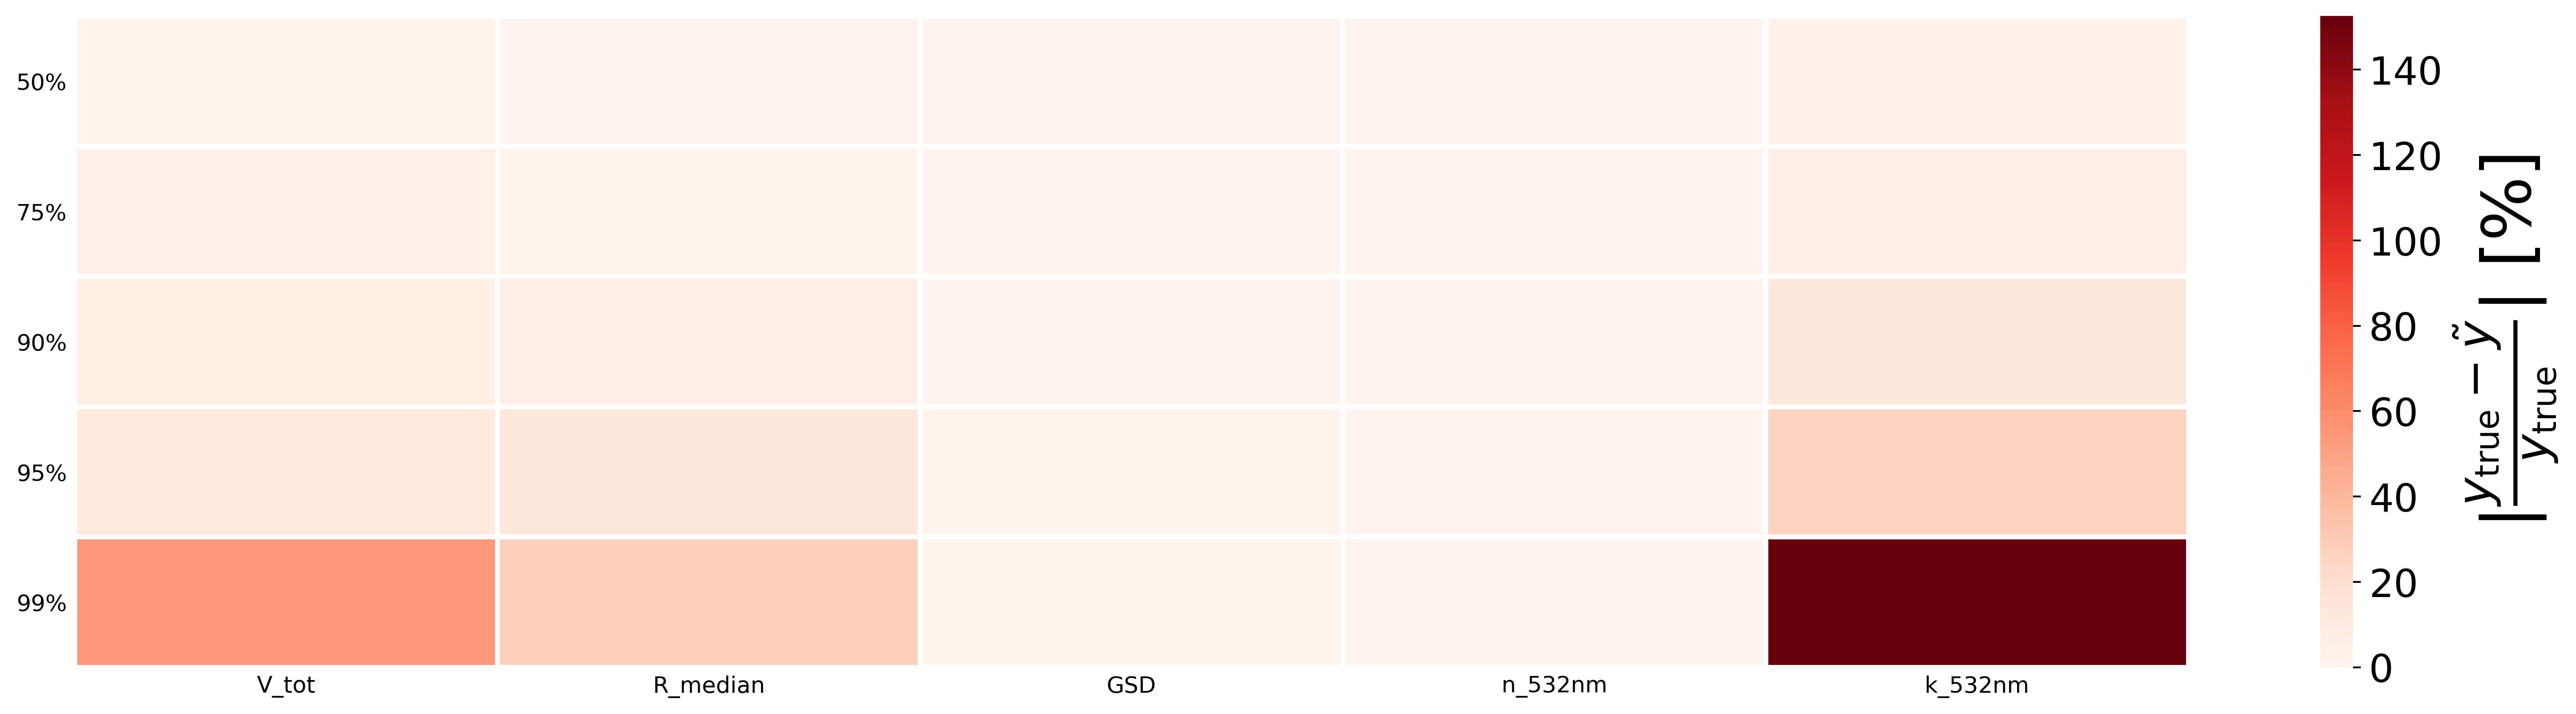

In [84]:
fig, ax = plt.subplots(figsize=(16, 4.5), dpi=400)

sns.heatmap(rel_error_table_iv,
            cmap='Reds',
       #     annot=False,
            linewidths=2.,
            vmin=0.,
            vmax=np.max(rel_error_table_iv.max()),
      #      annot_kws={'fontsize': 20},
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'},
            ax=ax)
ax.tick_params(labelsize=10, length=0)
ax.tick_params(axis='y', rotation=0)
#ax.xaxis.tick_top()

# adjust the size of the colorbar label
fig.axes[1].set_ylabel(fig.axes[1].get_ylabel(), fontsize=30);
fig.axes[1].tick_params(labelsize=17)

fig.tight_layout(rect=(0, 0, 1.05, 1))
fig.savefig(f'{plot_dir}/invertible_sampling_rel_error_percentiles.jpg')


In [85]:
# Rework plots below

In [86]:
surr.model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 330)]             0         
_________________________________________________________________
affine_coupling_block (Affin (None, 330)               30500     
_________________________________________________________________
permutation_layer (Permutati (None, 330)               0         
_________________________________________________________________
affine_coupling_block_1 (Aff (None, 330)               30500     
_________________________________________________________________
permutation_layer_1 (Permuta (None, 330)               0         
_________________________________________________________________
affine_coupling_block_2 (Aff (None, 330)               30500     
_________________________________________________________________
permutation_layer_2 (Permuta (None, 330)               0     

In [87]:
from keras.utils.vis_utils import plot_model

In [88]:
plot_model(surr.model, show_shapes=False,show_layer_names=True,to_file = f'{plot_dir}/model_architecture_invertible.png')


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


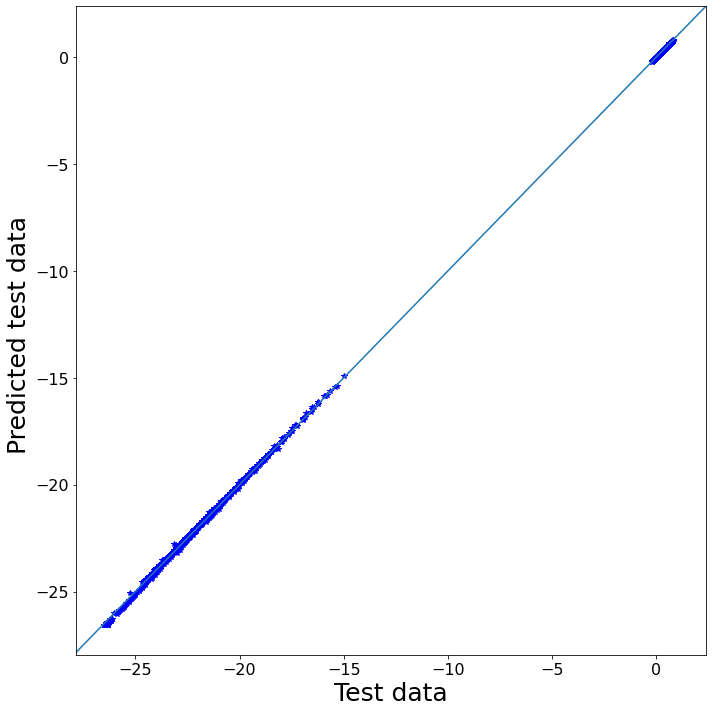

In [89]:
fig, ax = plt.subplots(figsize = (10,10))
for index in presentation_plot_index:
    ax.plot(qoi_pred_fw.iloc[index],qoi_test.iloc[index],'b*')
    
    #plt.yscale('logit')

ax.set_xlabel('Test data',fontsize = 25)
ax.set_ylabel('Predicted test data ',fontsize = 25)
ax.tick_params(labelsize = 16)    
fig.tight_layout() 


ax.axline([0, 0], [1, 1])
#fig.align_labels()
#ax.get_legend().get_title().set_fontsize('16')
fig.savefig(f'{plot_dir}/phase_data_correlation_fw.jpg')

In [90]:
r2_adj_fw = r2_adj_fw.rename({0: 'r2_adj'}, axis='index')
r2_adj_iv = r2_adj_iv.rename({0: 'r2_adj'}, axis='index')


# create overview plot

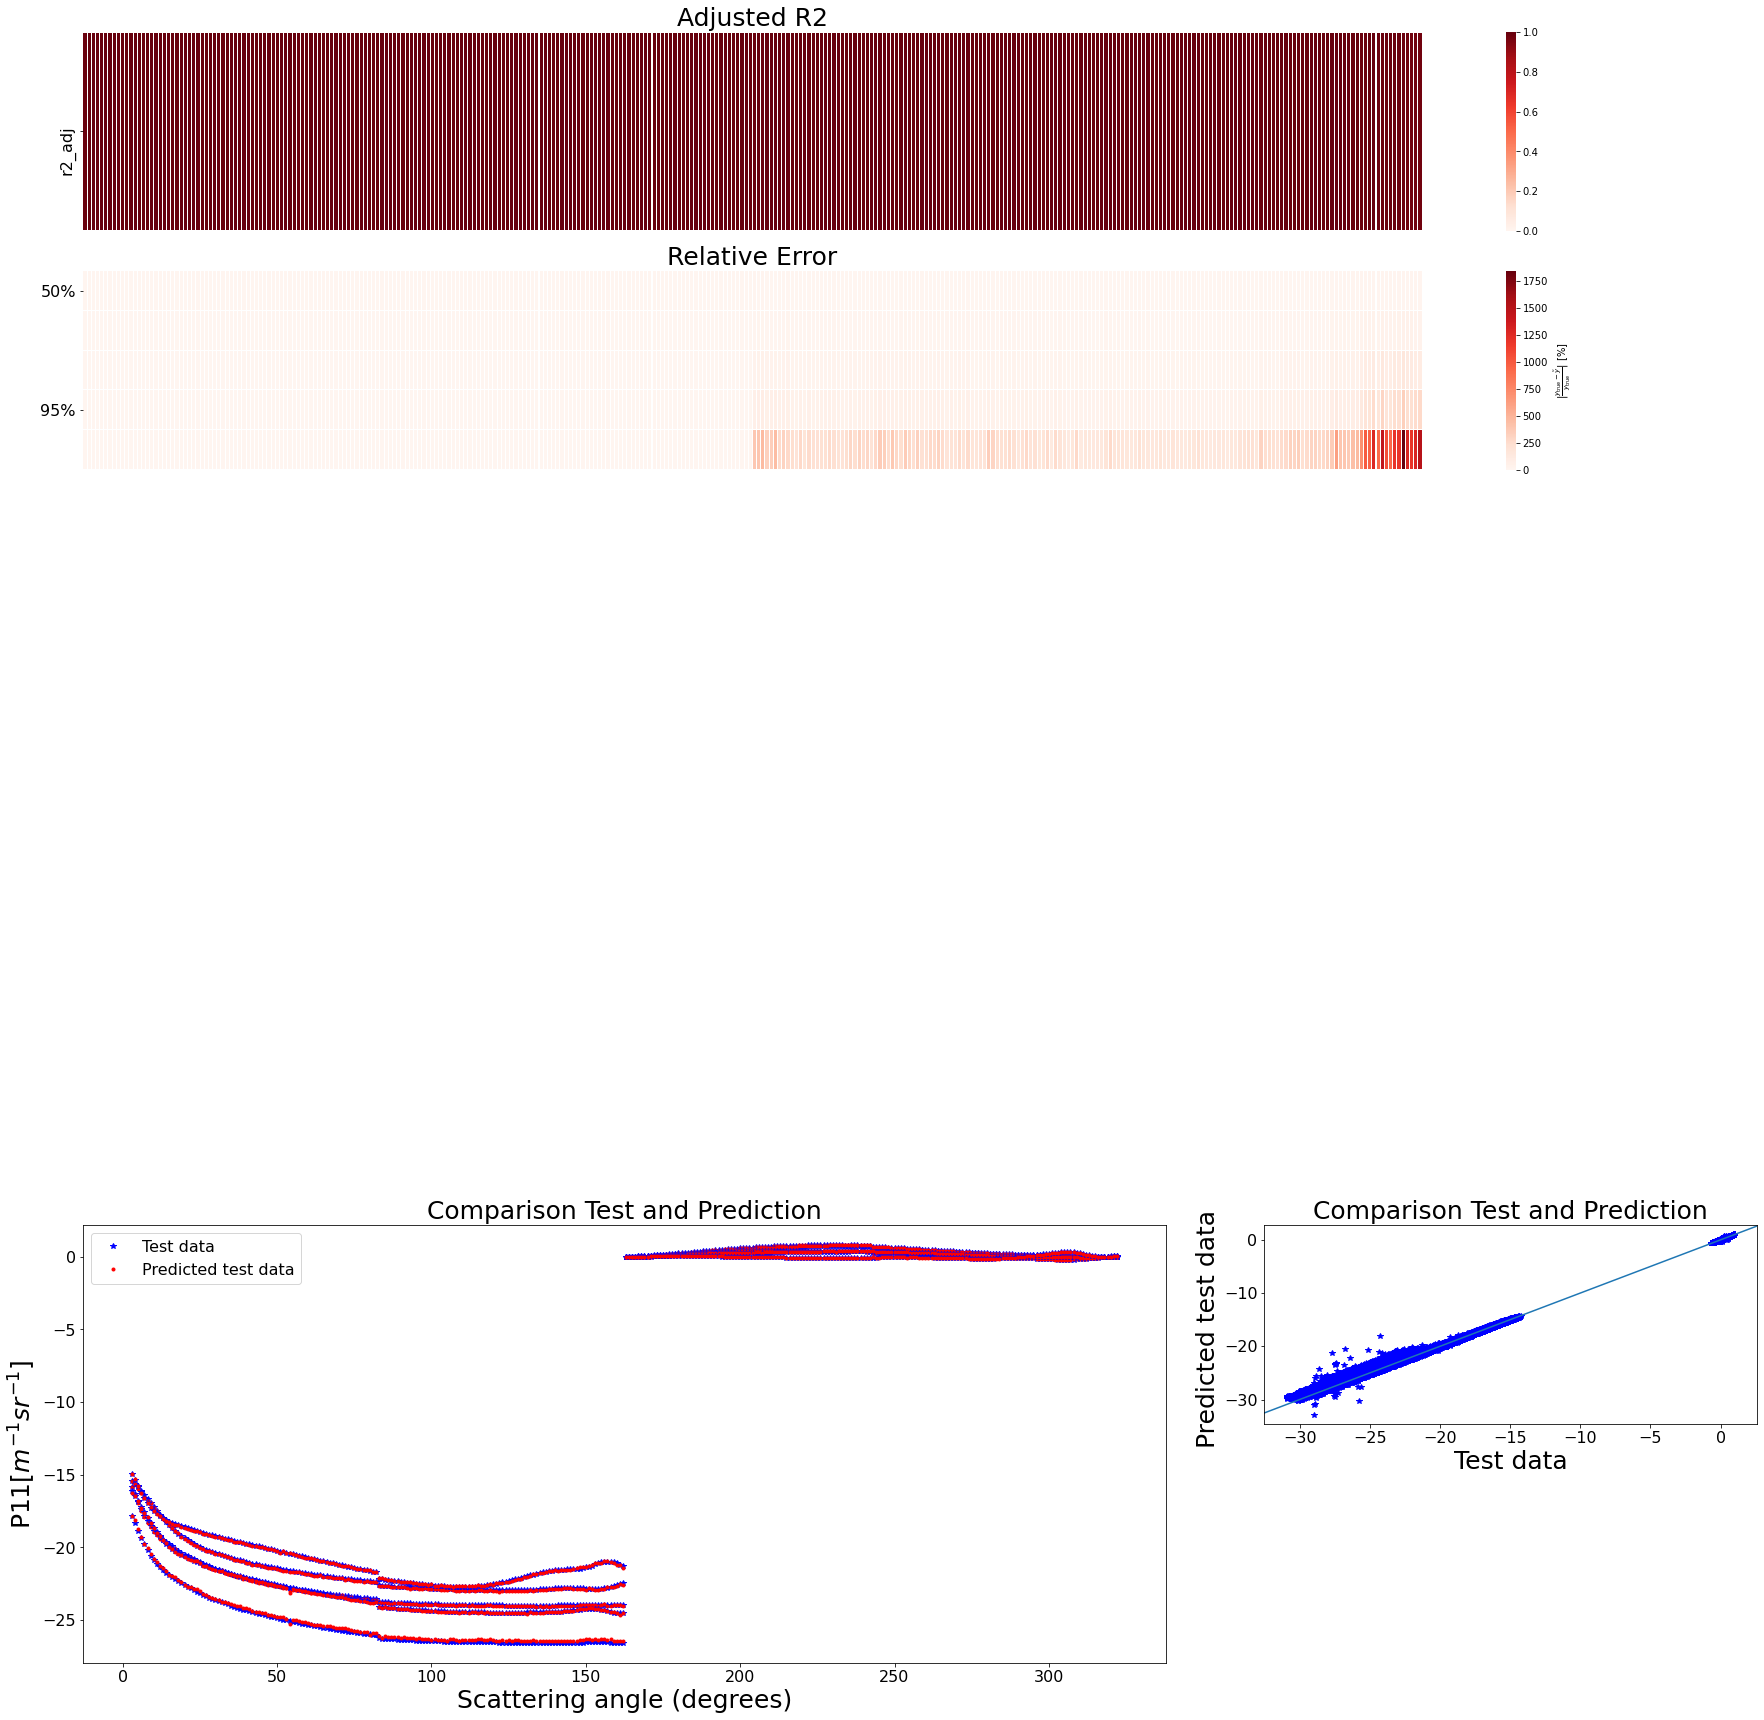

In [91]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(7,3)

plt.subplot2grid((7,3), (0,0), colspan=3, rowspan=1)
sns.heatmap(r2_adj_fw,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            xticklabels= False)
plt.tick_params(labelsize = 16)    
plt.title( 'Adjusted R2',fontsize = 25)

plt.subplot2grid((7,3), (1,0), colspan =3, rowspan =1)
sns.heatmap(rel_error_table_fw,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=np.max(rel_error_table_fw.max()),
            xticklabels = False,
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'})
plt.tick_params(labelsize = 16)    
plt.title( 'Relative Error',fontsize = 25)


#plt.subplot2grid((7,3), (2,0),colspan = 3, rowspan = 2)
#sns.heatmap(to_plot_fw,
#            vmin=-1.,
#            vmax=1.,
#            linewidths = 0.01,
#            cmap='coolwarm',)
#plt.tick_params(labelsize = 16)
#plt.title( 'Correlation between DVARs and QOIs',fontsize = 25)

plt.subplot2grid((7,3), (5,0), colspan = 2, rowspan = 2)
for index in presentation_plot_index:
    plot_test_data = plt.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = plt.plot(np.arange(3,len(qoi_pred_fw.columns)+3),qoi_pred_fw.iloc[index],'r.')
plt.xlabel('Scattering angle (degrees)',fontsize = 25)
plt.ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
plt.legend(['Test data', 'Predicted test data'], fontsize = 16)
#get_legend().get_title().set_fontsize('16')


plt.subplot2grid((7,3), (5,2), colspan = 1, rowspan = 1)
for index in qoi_test.index.values:
    plt.plot(qoi_test.iloc[index],qoi_pred_fw.iloc[index],'b*')
plt.title( 'Comparison Test and Prediction',fontsize = 25)    
plt.xlabel('Test data',fontsize = 25)
plt.ylabel('Predicted test data ',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.axline([-25, -25], [-8, -8])


fig.set_size_inches(w=30,h=30)
fig.savefig(f'{plot_dir}/overview_invertible_model_fw.jpg')



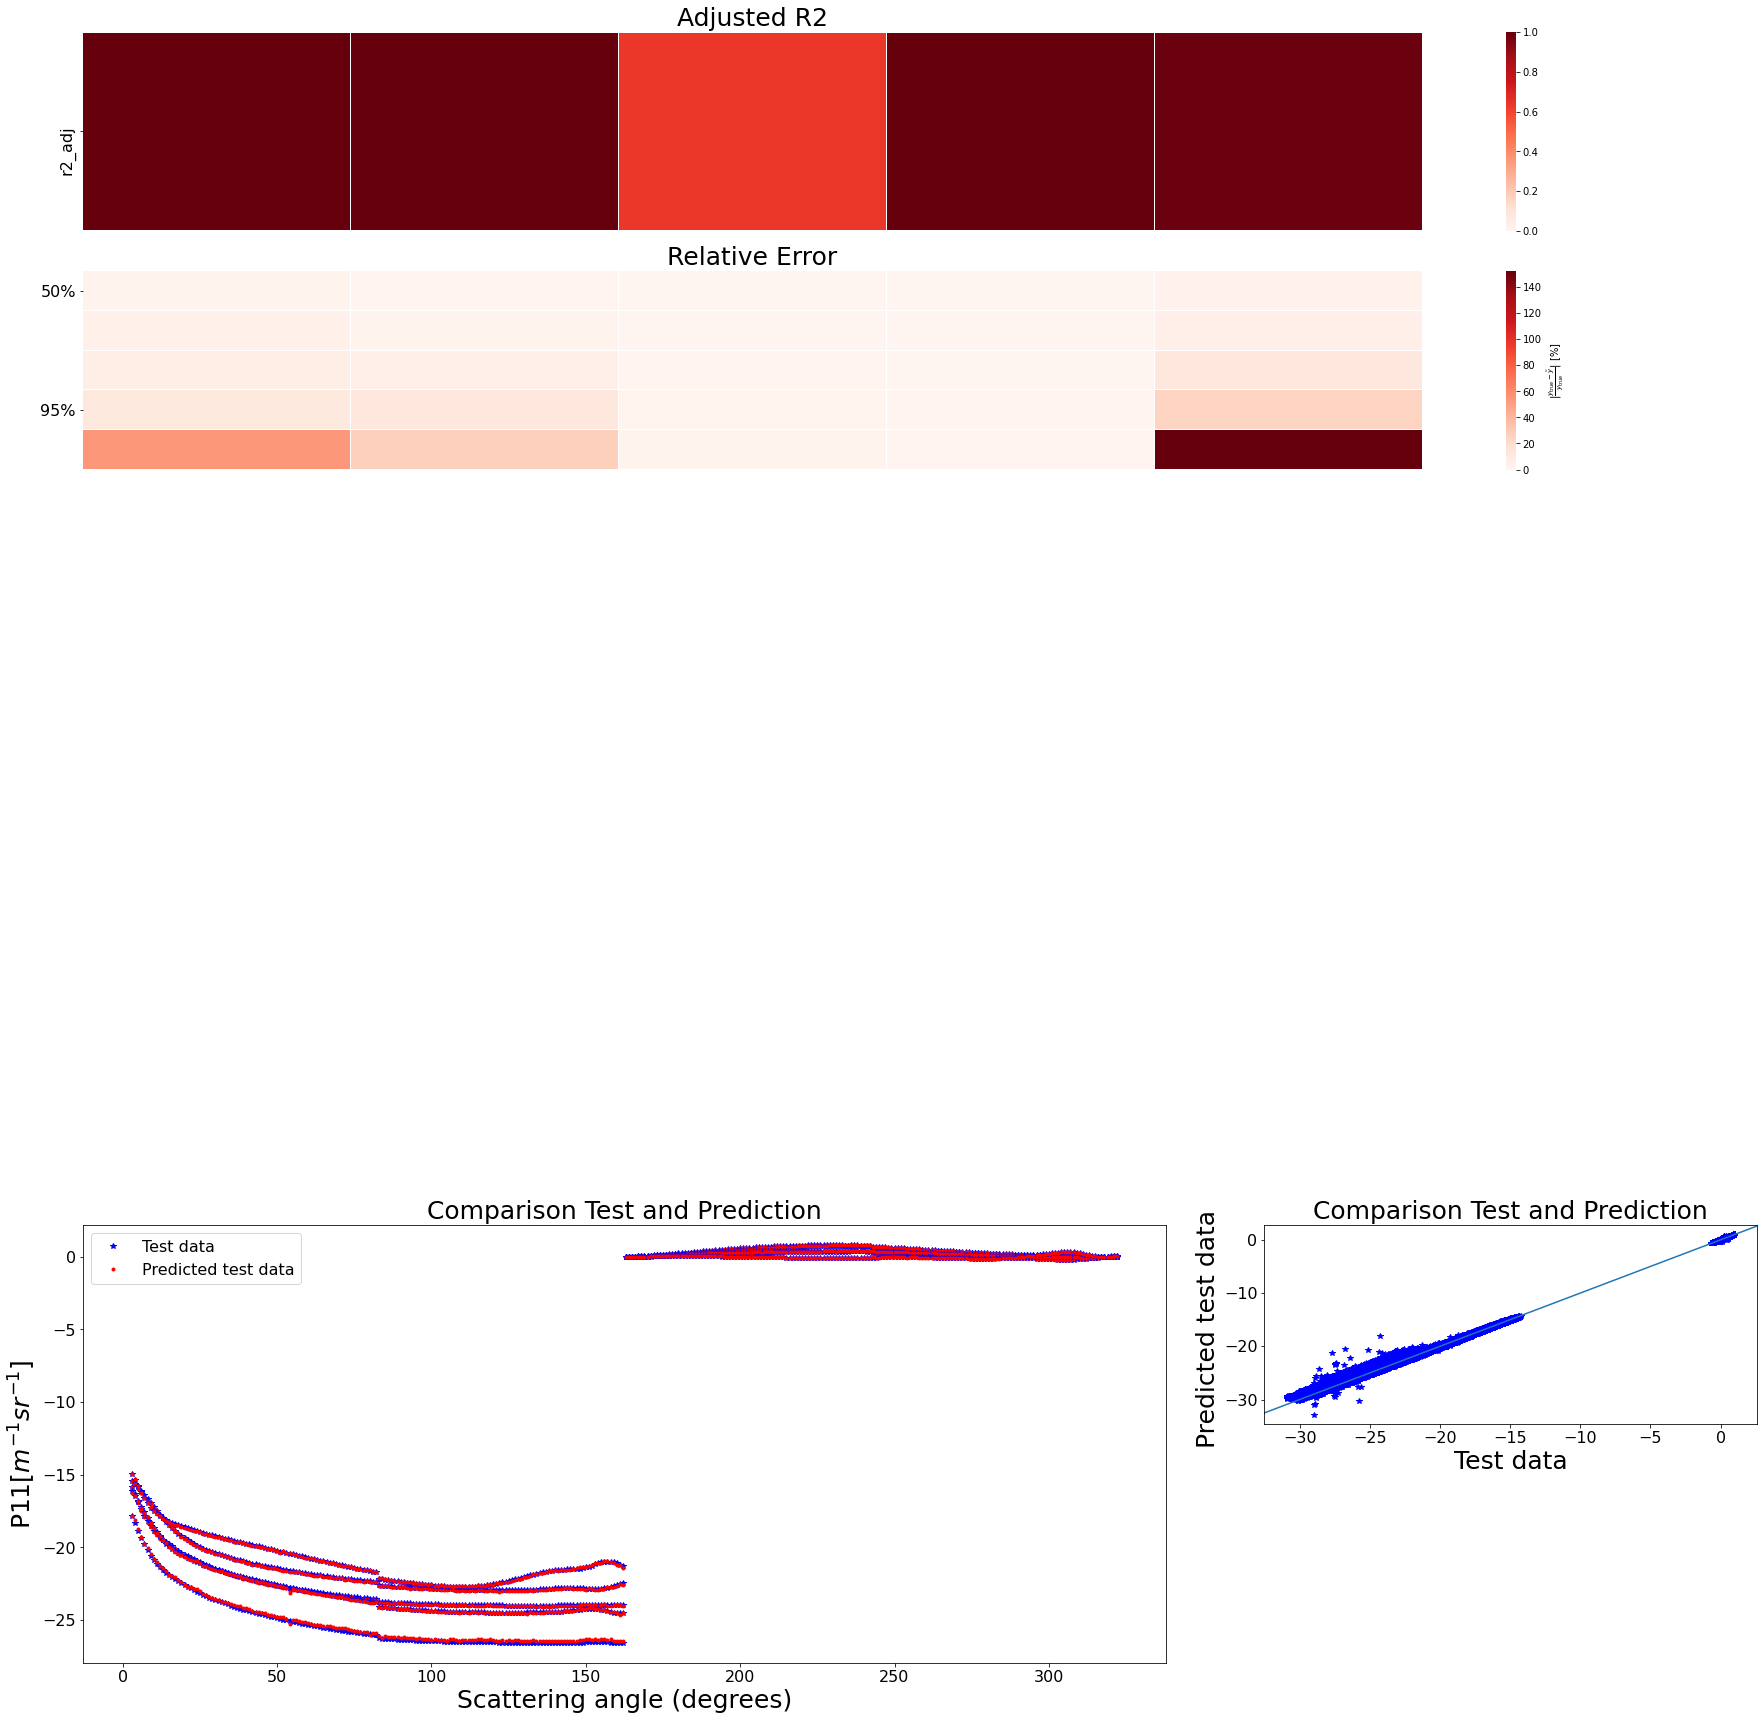

In [92]:
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(7,3)

plt.subplot2grid((7,3), (0,0), colspan=3, rowspan=1)
sns.heatmap(r2_adj_iv,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=1.,
            xticklabels= False)
plt.tick_params(labelsize = 16)    
plt.title( 'Adjusted R2',fontsize = 25)

plt.subplot2grid((7,3), (1,0), colspan =3, rowspan =1)
sns.heatmap(rel_error_table_iv,
            cmap='Reds',
            linewidths=0.01,
            vmin=0.,
            vmax=np.max(rel_error_table_iv.max()),
            xticklabels = False,
            cbar_kws={'label': r'$\left| \frac{y_\mathrm{true} - \tilde{y}}{y_\mathrm{true}} \right|$ [%]'})
plt.tick_params(labelsize = 16)    
plt.title( 'Relative Error',fontsize = 25)


#plt.subplot2grid((7,3), (2,0),colspan = 3, rowspan = 2)
#sns.heatmap(to_plot_iv,
#            vmin=-1.,
#            vmax=1.,
#            linewidths = 0.01,
#            cmap='coolwarm',)
#plt.tick_params(labelsize = 16)
#plt.title( 'Correlation between DVARs and QOIs',fontsize = 25)

plt.subplot2grid((7,3), (5,0), colspan = 2, rowspan = 2)
for index in presentation_plot_index:
    plot_test_data = plt.plot(np.arange(3,len(qoi_test.columns)+3),qoi_test.iloc[index],'b*')
    plot_pred_data = plt.plot(np.arange(3,len(qoi_pred_fw.columns)+3),qoi_pred_fw.iloc[index],'r.')
plt.xlabel('Scattering angle (degrees)',fontsize = 25)
plt.ylabel('P11[$m^{-1}sr^{-1}$]',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.title( 'Comparison Test and Prediction',fontsize = 25)
#fig.align_labels()
plt.legend(['Test data', 'Predicted test data'], fontsize = 16)
#get_legend().get_title().set_fontsize('16')


plt.subplot2grid((7,3), (5,2), colspan = 1, rowspan = 1)
for index in qoi_test.index.values:
    plt.plot(qoi_test.iloc[index],qoi_pred_fw.iloc[index],'b*')
plt.title( 'Comparison Test and Prediction',fontsize = 25)    
plt.xlabel('Test data',fontsize = 25)
plt.ylabel('Predicted test data ',fontsize = 25)
plt.tick_params(labelsize = 16)    
plt.axline([-25, -25], [-8, -8])


fig.set_size_inches(w=30,h=30)
fig.savefig(f'{plot_dir}/overview_invertible_model_iv.jpg')



In [93]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/preprocessed_by_hand/log_P11/mmscaled_2/model'

In [94]:
configs = pd.read_csv(f'{model_dir}/configs.csv')
configs.columns

FileNotFoundError: [Errno 2] No such file or directory: '/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/preprocessed_by_hand/log_P11/mmscaled_2/model/configs.csv'

In [95]:
store_results = pd.DataFrame()


In [ ]:
store_results['data_file'] = configs['config/datafile']
store_results['batch_size'] = configs['config/batch_size']
store_results['learning_rate'] = configs['config/learning_rate']
store_results['n_blocks'] = configs['config/n_blocks']
store_results['n_depth'] = configs['config/n_depth']
store_results['n_width'] = configs['config/n_width']
store_results['weight_x'] = configs['config/weight_x']
store_results['weight_y'] = configs['config/weight_y']
store_results['weight_z'] = configs['config/weight_z']
store_results['weight_artificial'] = configs['config/weight_artificial']
store_results['weight_reconstruction'] = configs['config/weight_reconstruction']
store_results['r2_val_qoi_max'] = configs['r2_val']
store_results['r2_val_dvar_max'] = configs['r2_val_dvar']

In [102]:

store_results['r2_test_qoi_max'] = np.min(r2_adj_fw.min())
store_results['r2_test_dvar_n'] = r2_adj_iv['n_532nm']['r2_adj']
store_results['r2_test_dvar_k'] = r2_adj_iv['k_532nm']['r2_adj']
store_results['r2_test_dvar_V'] = r2_adj_iv['V_tot']['r2_adj']
store_results['r2_test_dvar_R'] = r2_adj_iv['R_median']['r2_adj']
store_results['r2_test_dvar_GSD'] = r2_adj_iv['GSD']['r2_adj']
store_results['rel_error95%_qoi_P11_max'] = rel_error_table_fw_P11.max(axis = 1)['95%']
store_results['rel_error95%_qoi_P12_max'] = rel_error_table_fw_P12.max(axis = 1)['95%']
store_results['rel_error95%_dvar_n'] = rel_error_table_iv['n_532nm']['95%']
store_results['rel_error95%_dvar_k'] = rel_error_table_iv['k_532nm']['95%']
store_results['rel_error95%_dvar_V'] = rel_error_table_iv['V_tot']['95%']
store_results['rel_error95%_dvar_R'] = rel_error_table_iv['R_median']['95%']
store_results['rel_error95%_dvar_GSD'] = rel_error_table_iv['GSD']['95%']
store_results['MAE%_qoi_max'] = np.max([np.abs(np.min(MAE_all_p)),np.abs(np.max(MAE_all_p))])
store_results['MAE%_dvar_n'] = MAE_dvar_p['n_532nm']
store_results['MAE%_dvar_k'] = MAE_dvar_p['k_532nm']
store_results['MAE%_dvar_V'] = MAE_dvar_p['V_tot']
store_results['MAE%_dvar_R'] = MAE_dvar_p['R_median']
store_results['MAE%_dvar_GSD'] = MAE_dvar_p['GSD']
store_results['explained_variance_qoi_min'] = np.min(EVS_all_df.min())
store_results['explained_variance_dvar_n'] = EVS_dvar['n_532nm']
store_results['explained_variance_dvar_k'] = EVS_dvar['k_532nm']
store_results['explained_variance_dvar_V'] = EVS_dvar['V_tot']
store_results['explained_variance_dvar_R'] = EVS_dvar['R_median']
store_results['explained_variance_dvar_GSD'] = EVS_dvar['GSD']

In [103]:
store_results.to_csv(f'{model_dir}/results_summary.csv')


In [98]:
model_dir

'/data/project/general/aerosolretriev/aerosol_results_rb/simulated_data/preprocessed_by_hand/log_P11/mmscaled_2/model'

In [101]:
r2_adj_iv['n_532nm']['r2_adj']

1.0